### PREDICTIVE ANALYSIS WITH POLYNOMIAL REGRESSION: MODEL EVALUATION

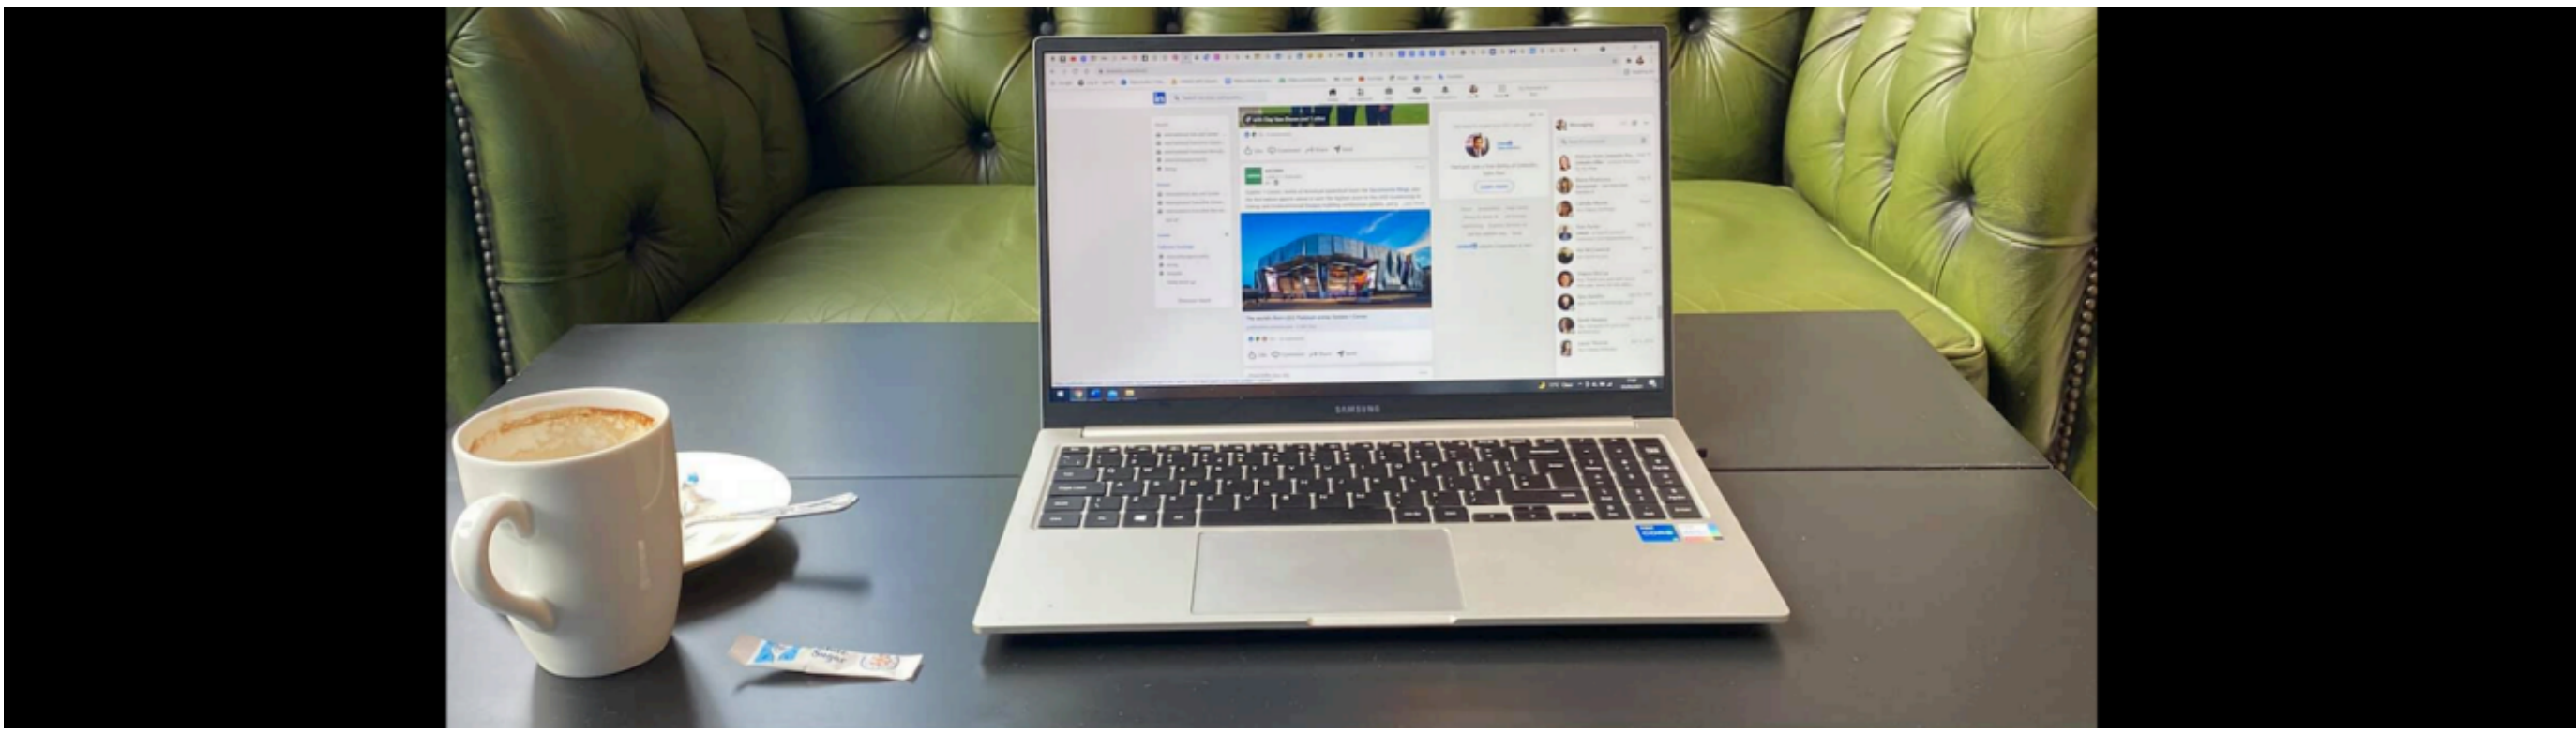

### HEMANT THAPA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
pd.options.display.max_colwidth = None
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.utils.validation')

#### DATA MINNING 

In [2]:
#using yfinance for data minning
def stock(ticker, time):
    return yf.download(ticker, period=time)

# FTSE 100 Index

The FTSE 100 is a UK stock market index representing the top 100 companies listed on the London Stock Exchange.

**Key Points:**

- Composition: The FTSE 100 includes companies from diverse sectors, such as finance, energy, healthcare, consumer goods, and technology.
- Weighting:  The index is weighted by market capitalization, meaning that larger companies have a greater influence on its performance.
- Global: Many FTSE 100 companies have a global presence and derive a significant portion of their revenues from international markets.
- Benchmark: The FTSE 100 serves as a benchmark to evaluate the performance of investment portfolios and mutual funds.
- Dividends: FTSE 100 companies are known for paying consistent and attractive dividends to shareholders.
- Performance: The index has experienced both growth and fluctuations over its history, with its peak during the dot-com bubble in December 1999.
- Trading Hours: The FTSE 100 follows the trading hours of the London Stock Exchange, typically from 8:00 AM to 4:30 PM (GMT) on regular business days.
- Accessibility: Investors can gain exposure to the FTSE 100 through exchange-traded funds (ETFs), index funds, futures contracts, and options.


In [3]:
#collecting data of ftse 100, which are top uk 100 companies 
ftse = stock("^FTSE", "3Y")

[*********************100%%**********************]  1 of 1 completed


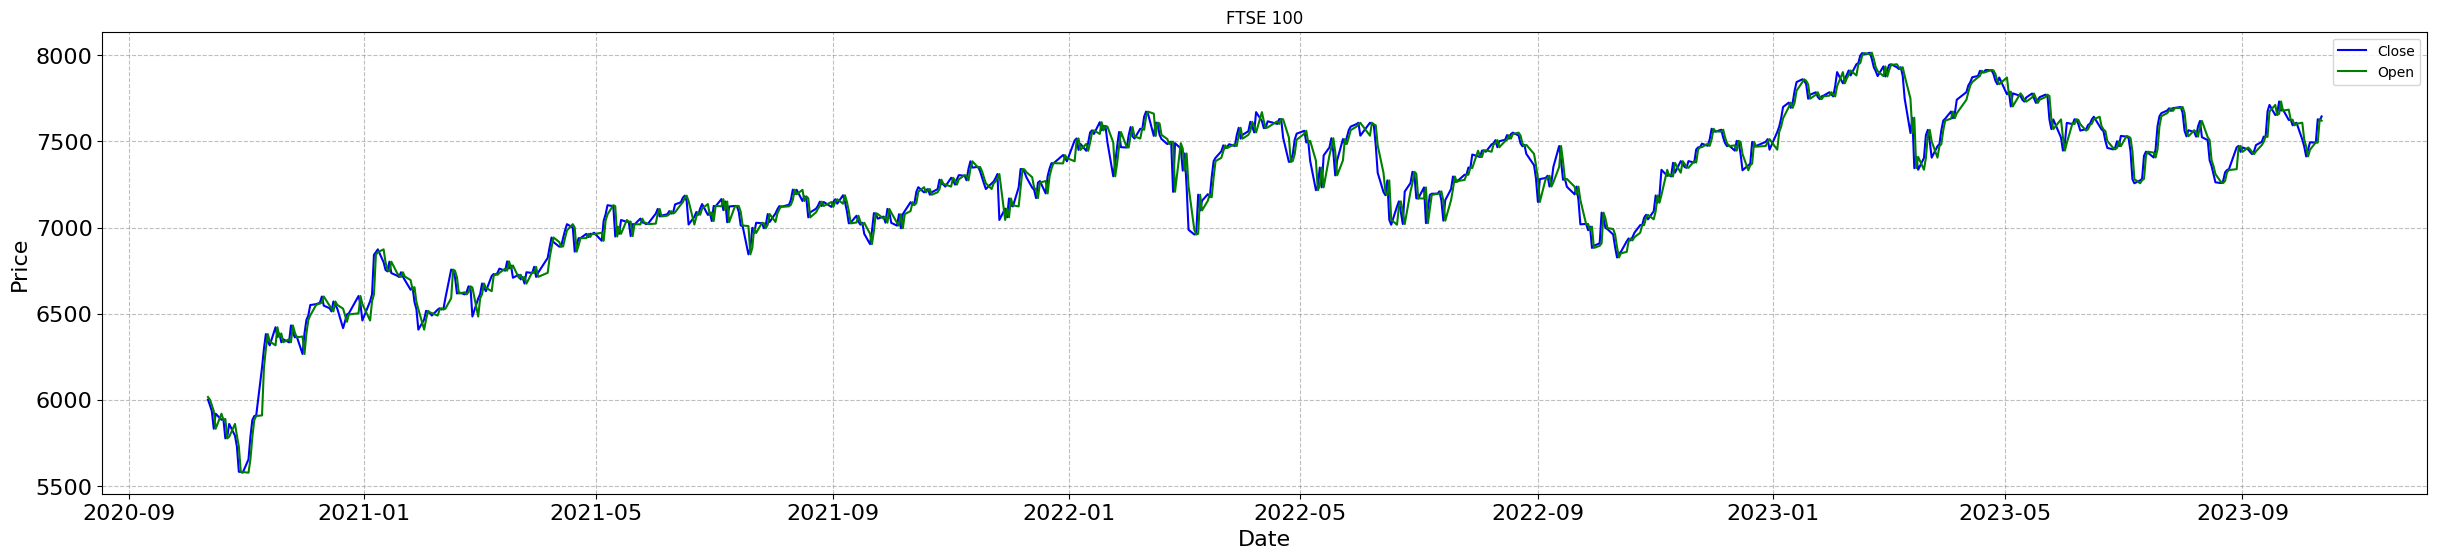

In [4]:
plt.figure(figsize=(30,6))
plt.plot(ftse.index, ftse.Close, lw=1.5, color='blue', label='Close')
plt.plot(ftse.index, ftse.Open, lw=1.5, color='green', label='Open')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('FTSE 100')
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.legend()
plt.show()

In [5]:
ftse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-10-12  6016.700195  6037.100098  5995.100098  6001.399902  6001.399902   
2020-10-13  6001.399902  6008.000000  5950.000000  5969.700195  5969.700195   
2020-10-14  5969.700195  6009.799805  5926.500000  5935.100098  5935.100098   
2020-10-15  5935.100098  5935.100098  5786.200195  5832.500000  5832.500000   
2020-10-16  5832.500000  5933.799805  5832.500000  5919.600098  5919.600098   

               Volume  
Date                   
2020-10-12  600961600  
2020-10-13  786877800  
2020-10-14  613220800  
2020-10-15  667215200  
2020-10-16  669807200

In [6]:
ftse.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-10-06  7451.500000  7496.399902  7423.399902  7494.600098  7494.600098   
2023-10-09  7494.600098  7540.600098  7473.200195  7492.200195  7492.200195   
2023-10-10  7492.200195  7637.399902  7492.200195  7628.200195  7628.200195   
2023-10-11  7628.200195  7652.000000  7608.700195  7620.000000  7620.000000   
2023-10-12  7620.029785  7687.910156  7620.029785  7644.779785  7644.779785   

               Volume  
Date                   
2023-10-06  613195400  
2023-10-09  738697000  
2023-10-10  719653800  
2023-10-11  630293300  
2023-10-12          0

In [7]:
intial_ftse = ftse['Close'].head(1).values[0]
final_ftse = ftse['Close'].tail(1).values[0]

In [8]:
final_ftse

7644.77978515625

In [9]:
ftse_growth = (final_ftse - intial_ftse) / intial_ftse * 100
print(f'FTSE100 Growth in 3 years: {round(ftse_growth,2)} %')

FTSE100 Growth in 3 years: 27.38 %


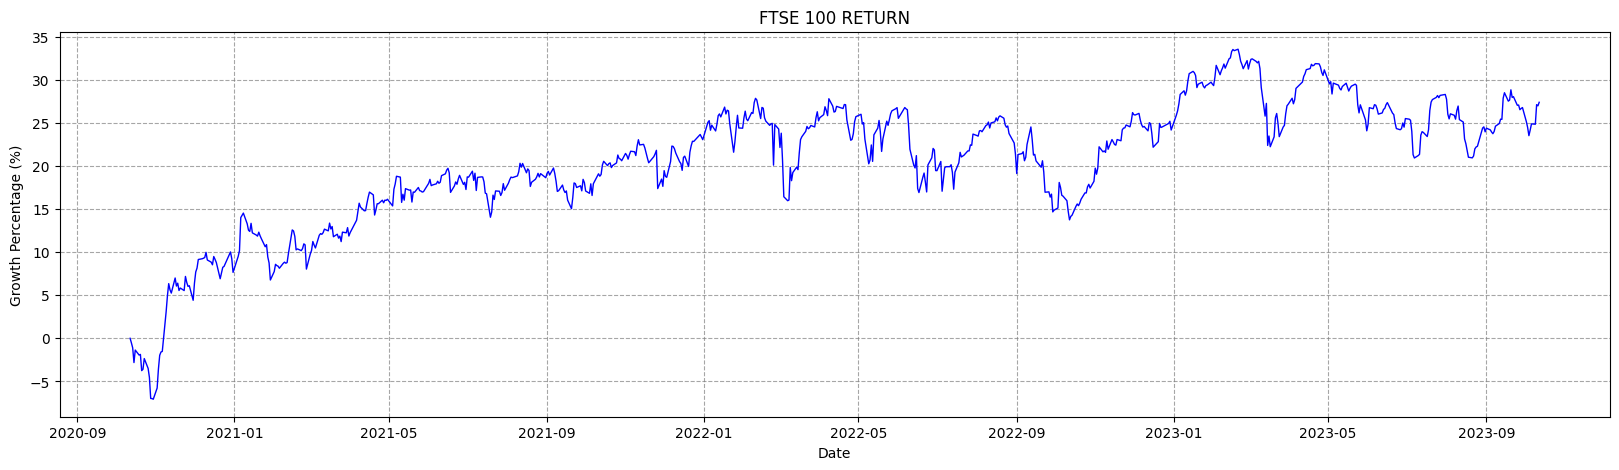

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(ftse.index, (ftse['Close'] / ftse['Close'].iloc[0] - 1) * 100, color="blue", linewidth=1)
plt.ylabel('Growth Percentage (%)')
plt.xlabel('Date')
plt.title('FTSE 100 RETURN')
plt.grid(linestyle='--', color='grey', alpha=0.7)
plt.show()

# HSBC Bank UK

- **Background**: A subsidiary of HSBC Holdings plc, a global banking and financial services group.
- **History**: HSBC has a long-standing presence in the UK, dating back to the 19th century.
- **Services**: Offers a comprehensive range of banking services, including retail, wealth management, commercial, and investment banking.
- **Network**: Extensive branch and ATM network across the UK for convenient access.
- **International Reach**: Part of the HSBC Group, providing global banking solutions.
- **Digital Banking**: Offers online and mobile banking services.
- **Responsibility**: Emphasizes corporate responsibility and sustainability.
- **Regulation**: Regulated by the Financial Conduct Authority (FCA) and Prudential Regulation Authority (PRA).
- **Products**: Provides savings, mortgages, loans, credit cards, investments, insurance, and more.
- **Customer Base**: Serves individuals, SMEs, and large corporations.
- **Brand Recognition**: Known for its iconic red and white hexagon logo.


In [11]:
#collecting data of HSBC 
hsbc = stock("HSBA.L", "3Y")

[*********************100%%**********************]  1 of 1 completed


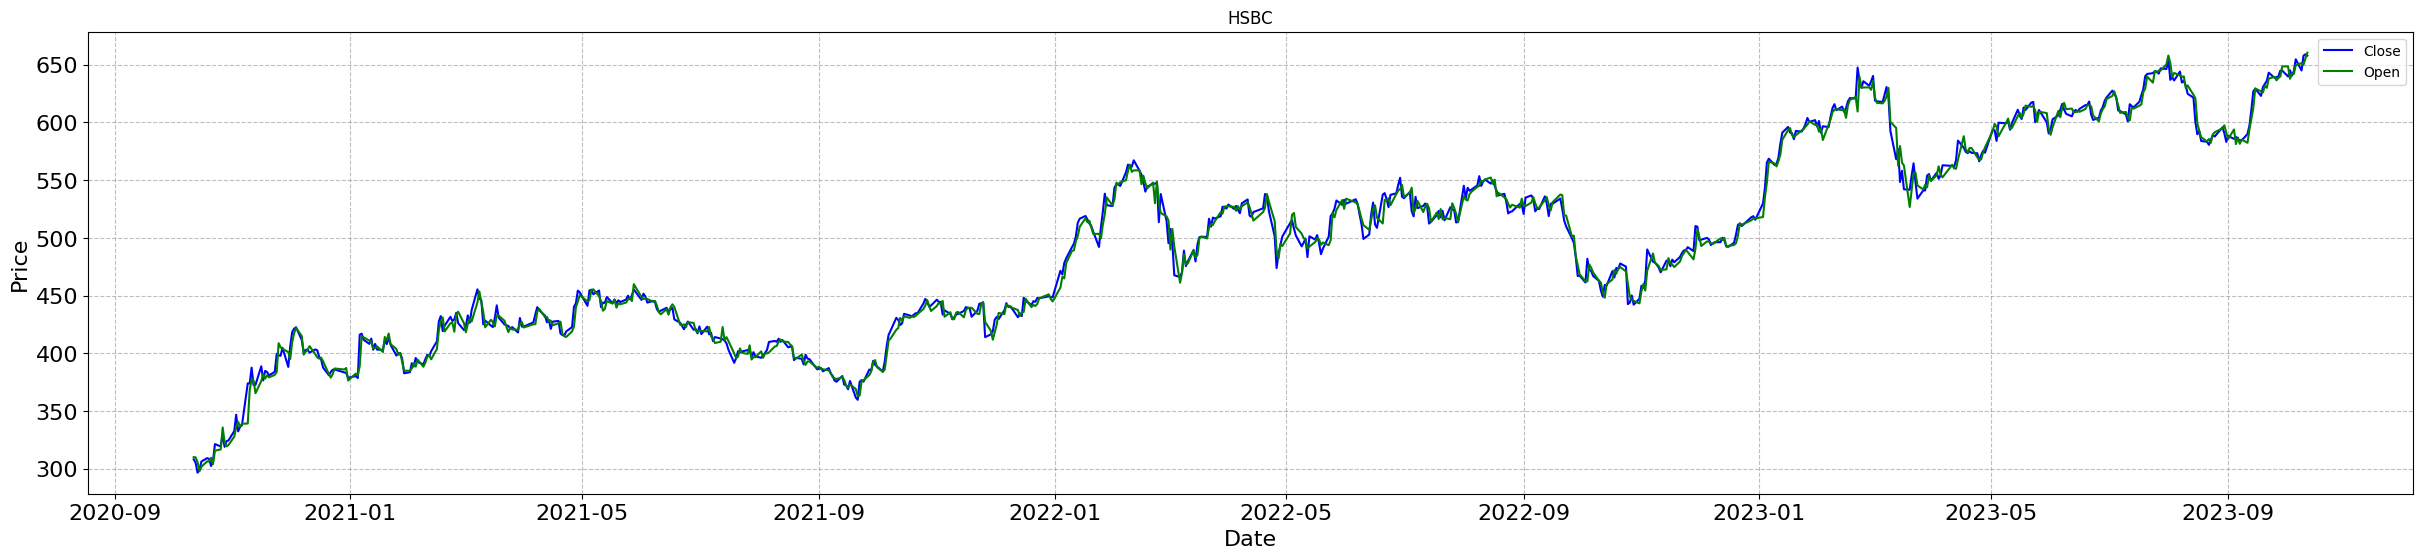

In [12]:
plt.figure(figsize=(30,6))
plt.plot(hsbc.index, hsbc.Close, lw=1.5, color='blue', label='Close')
plt.plot(hsbc.index, hsbc.Open, lw=1.5, color='green', label='Open')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('HSBC')
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.legend()
plt.show()

In [13]:
hsbc.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-12  310.100006  313.649994  308.200012  308.200012  267.284210   
2020-10-13  309.899994  310.500000  302.850006  305.200012  264.682465   
2020-10-14  305.799988  307.000000  296.600006  296.600006  257.224152   
2020-10-15  297.899994  299.950012  292.799988  299.250000  259.522308   
2020-10-16  301.799988  306.649994  297.700012  306.350006  265.679779   

              Volume  
Date                  
2020-10-12  16583751  
2020-10-13  18209805  
2020-10-14  29604316  
2020-10-15  29243160  
2020-10-16  32523159

In [14]:
hsbc.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-06  649.599976  657.700012  642.000000  654.700012  654.700012   
2023-10-09  651.400024  652.599976  641.500000  645.000000  645.000000   
2023-10-10  650.000000  660.599976  648.200012  657.799988  657.799988   
2023-10-11  655.400024  661.500000  651.099976  659.000000  659.000000   
2023-10-12  660.400024  664.500000  654.599976  657.900024  657.900024   

              Volume  
Date                  
2023-10-06  37660935  
2023-10-09  18973365  
2023-10-10  34573439  
2023-10-11  17751343  
2023-10-12  29997989

In [15]:
#HSBC price is in pence, we are converting pence to pound
hsbc['Close'] = hsbc['Close'] / 100

In [16]:
intial_hsbc = hsbc['Close'].head(1).values[0]
final_hsbc = hsbc['Close'].tail(1).values[0]

In [17]:
hsbc_growth = (final_hsbc - intial_hsbc) / intial_hsbc * 100
print(f'HSBC Growth in 3 years: {round(hsbc_growth,2)} %')

HSBC Growth in 3 years: 113.47 %


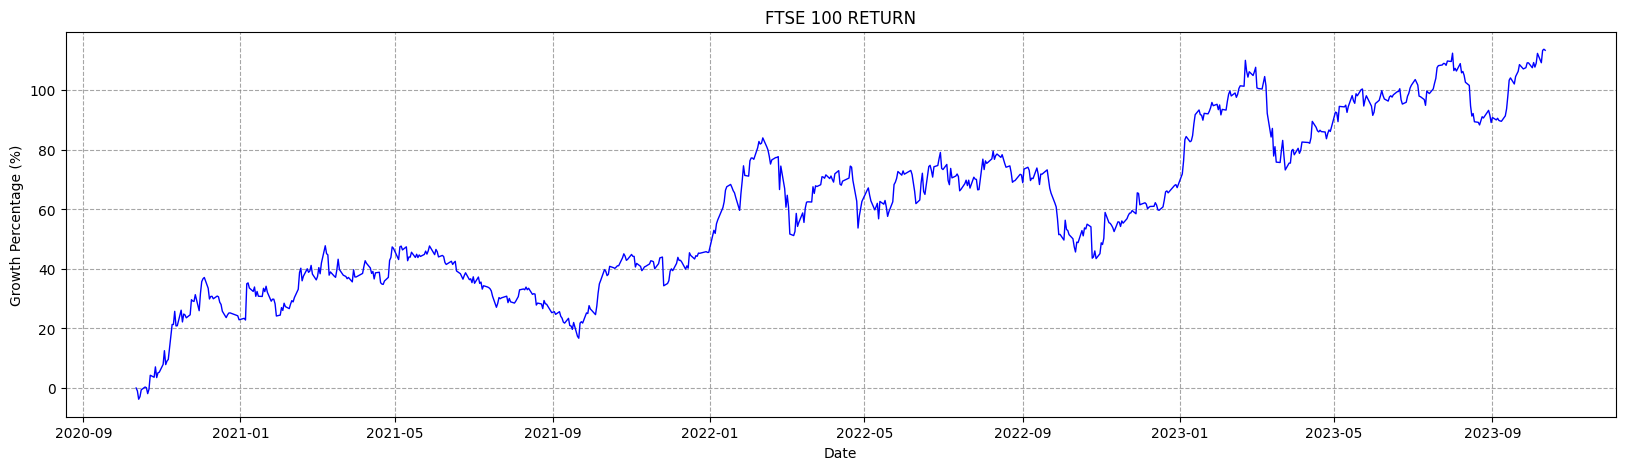

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(hsbc.index, (hsbc['Close'] / hsbc['Close'].iloc[0] - 1) * 100, color="blue", linewidth=1)
plt.ylabel('Growth Percentage (%)')
plt.xlabel('Date')
plt.title('FTSE 100 RETURN')
plt.grid(linestyle='--', color='grey', alpha=0.7)
plt.show()

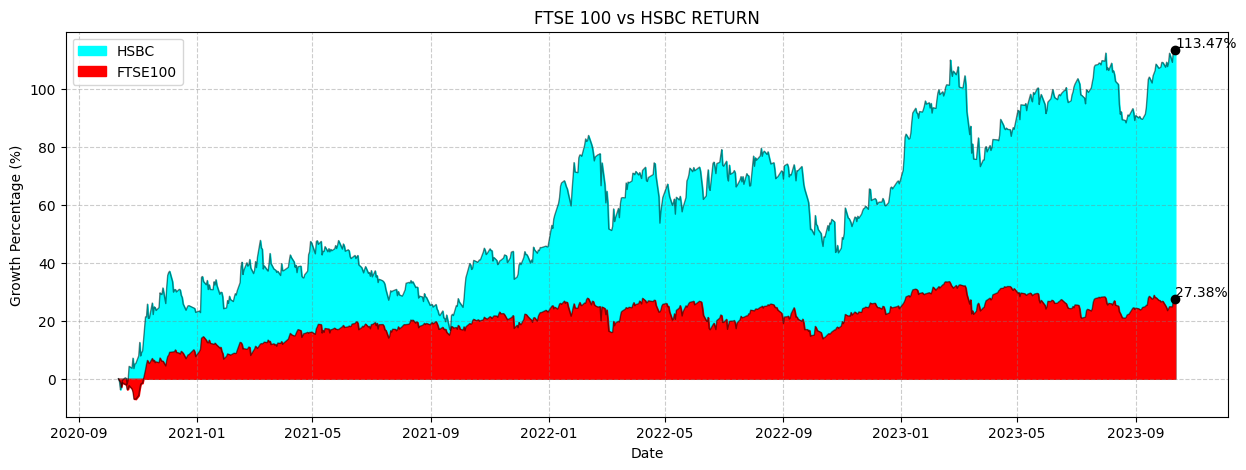

In [19]:
plt.figure(figsize=(15, 5))
#HSBC growth
plt.fill_between(hsbc.index, 0, (hsbc['Close'] / hsbc['Close'].iloc[0] - 1) * 100, color="cyan", label='HSBC')
plt.plot(hsbc.index, (hsbc['Close'] / hsbc['Close'].iloc[0] - 1) * 100, color="black", alpha=0.5, linewidth=1)
#FTSE 100 growth
plt.fill_between(ftse.index, 0, (ftse['Close'] / ftse['Close'].iloc[0] - 1) * 100, color="red", label='FTSE100')
plt.plot(ftse.index, (ftse['Close'] / ftse['Close'].iloc[0] - 1) * 100, color="black", alpha=0.5, linewidth=1)

plt.scatter(hsbc.index[-1], (hsbc['Close'].iloc[-1] / hsbc['Close'].iloc[0] - 1) * 100, color="black")
plt.scatter(ftse.index[-1], (ftse['Close'].iloc[-1] / ftse['Close'].iloc[0] - 1) * 100, color="black")
plt.text(hsbc.index[-1], (hsbc['Close'].iloc[-1] / hsbc['Close'].iloc[0] - 1) * 100, f'{(hsbc["Close"].iloc[-1] / hsbc["Close"].iloc[0] - 1) * 100:.2f}%', va='bottom')
plt.text(ftse.index[-1], (ftse['Close'].iloc[-1] / ftse['Close'].iloc[0] - 1) * 100, f'{(ftse["Close"].iloc[-1] / ftse["Close"].iloc[0] - 1) * 100:.2f}%', va='bottom')
plt.ylabel('Growth Percentage (%)')
plt.xlabel('Date')
plt.title('FTSE 100 vs HSBC RETURN')
plt.grid(linestyle='--', color='grey', alpha=0.4)
plt.legend()
plt.show()

### FEATURE SELECTION

#### Financial Analysis: FTSE 100 and HSBC

In our financial analysis, we will consider the FTSE 100 as our **Independent Variable** and HSBC, one of the constituent companies of the FTSE 100, as our **Dependent Variable**.

#### Independent Variable: FTSE 100
The FTSE 100 is a significant stock market index representing the top 100 companies listed on the London Stock Exchange. It serves as a benchmark for the broader UK stock market and is influenced by various economic and market factors.

#### Dependent Variable: HSBC
HSBC is one of the companies included in the FTSE 100 index. As a global banking and financial services entity, HSBC's performance is closely tied to various economic indicators and market conditions. We will analyze how HSBC's stock price and financial performance correlate with movements in the FTSE 100.

Our analysis will explore the relationship between these variables and assess how changes in the FTSE 100 may impact HSBC's financial performance. By doing so, we aim to gain insights into the dynamics between this key index and one of its constituent companies.


In [20]:
#Independent Variable
X = ftse['Close'].values.reshape(-1, 1)

In [21]:
#Dependent Variable
y = hsbc['Close']

### FEATURES SCALING 

#### Standardization (Z-score normalization)

Standardization is a feature scaling method that transforms numerical features to have a mean of 0 and a standard deviation of 1. 

It is particularly useful when your data approximately follows a Gaussian (normal) distribution.

#### Advantages:

- Standardization makes it easier to compare and interpret the significance of different features.
- It is less affected by outliers compared to some other scaling methods.
- Many machine learning algorithms, like support vector machines and k-means clustering, perform better with standardized features.

Use standardization when you want to ensure that your features have a consistent scale and are centered around zero with a spread of 1.


In [22]:
print(f'Independent Variables: {X.shape}')
print(f'Dependent Varaibles: {y.shape}')

Independent Variables: (756, 1)
Dependent Varaibles: (757,)


In [23]:
y = y[:len(X)]

In [24]:
print(f'Independent Variables: {X.shape}')
print(f'Dependent Varaibles: {y.shape}')

Independent Variables: (756, 1)
Dependent Varaibles: (756,)


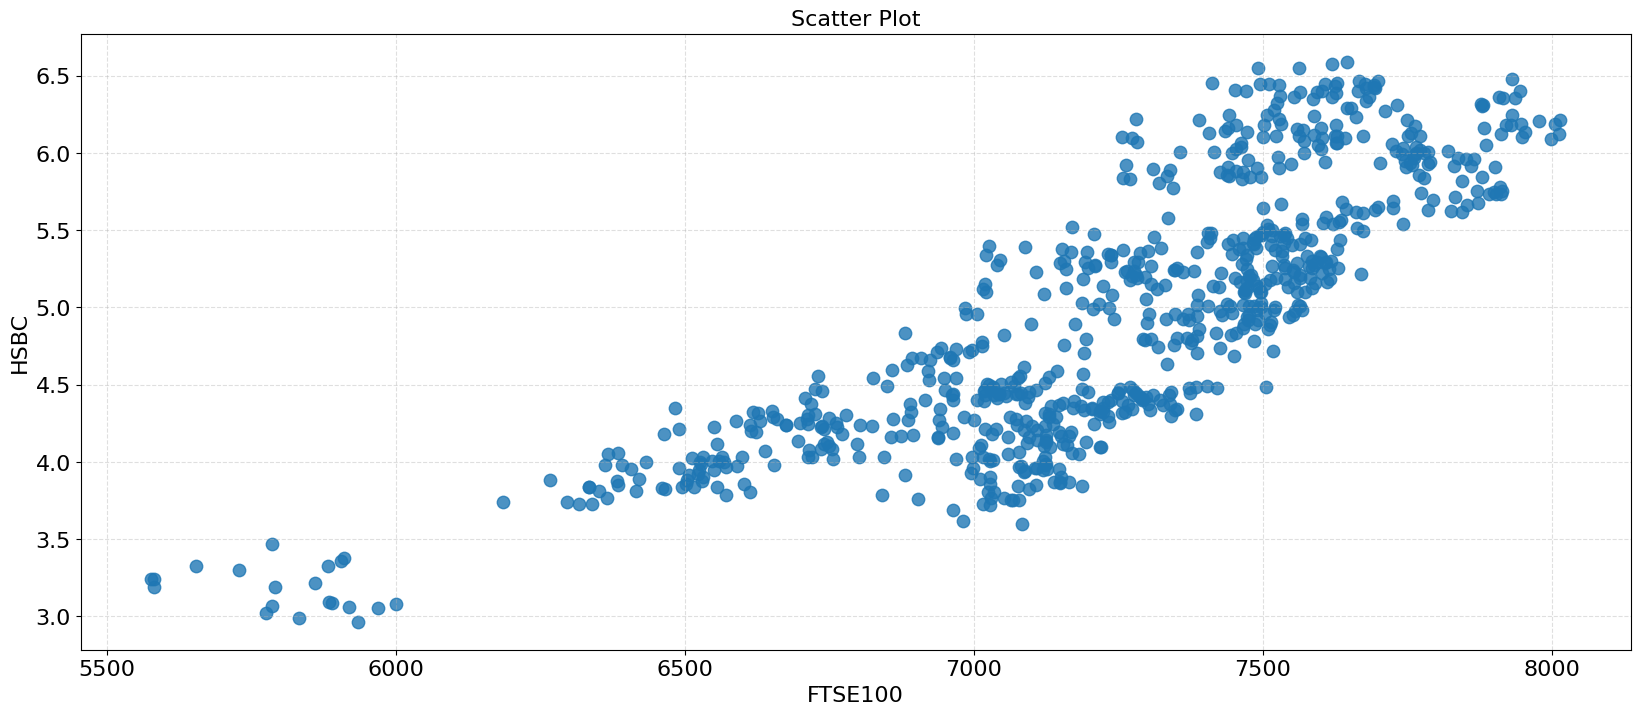

In [25]:
plt.figure(figsize=(20,8))
plt.scatter(X, y, alpha=0.8, s=80)
plt.xlabel('FTSE100', fontsize=16)
plt.ylabel('HSBC', fontsize=16)
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.title('Scatter Plot', fontsize=16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

Now, we are going to divide data into two set, train and test set. where, eighty percent will be train set and twenty percent will be test set. 

we have also observe that, Independent and dependent variables do not have linear relationship. we are going to use, polynomial regression models of different degrees to the data, we can compare how well each model fits the data. This helps us understand which degree of polynomial provides the best trade-off between model complexity and model fit. It allows us to assess whether a linear, quadratic, cubic, or higher-degree polynomial best captures the underlying patterns in the data.

![Alt text](image-1.png)

In [26]:
X = (X - X.mean())/ X.std()
# y = (y - y.mean())/ y.std()

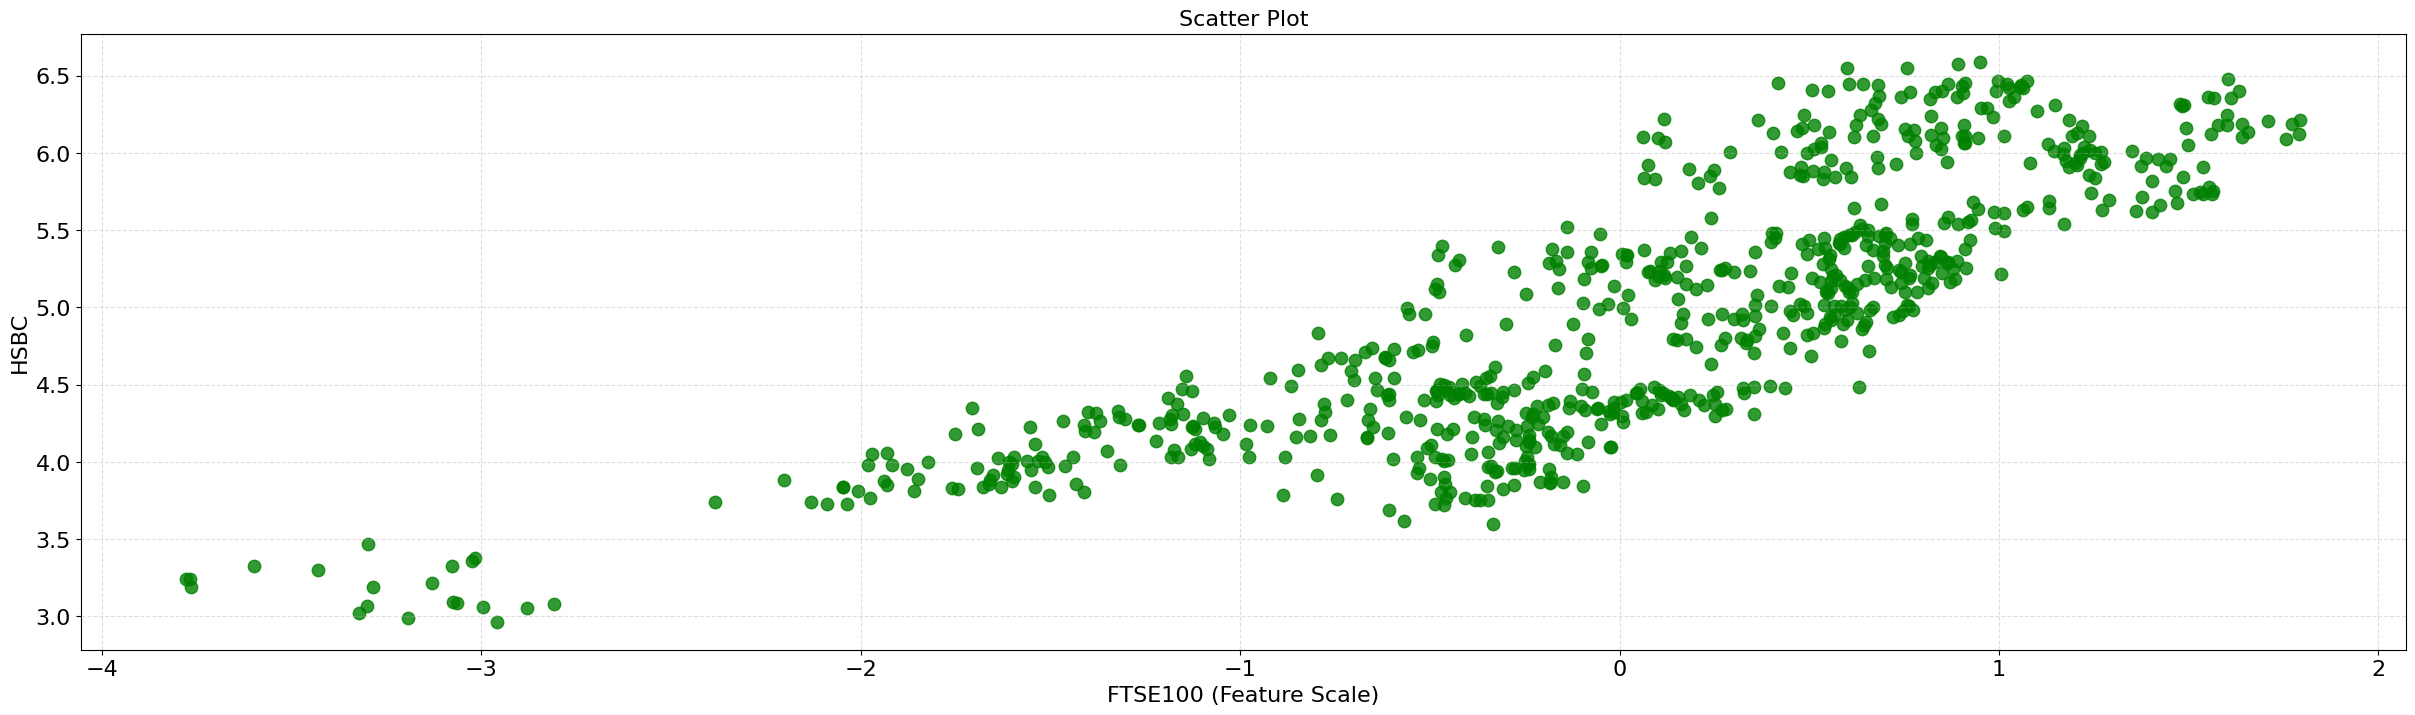

In [27]:
plt.figure(figsize=(30,8))
plt.scatter(X, y, alpha=0.8, s=80, color='green')
plt.xlabel('FTSE100 (Feature Scale)', fontsize=16)
plt.ylabel('HSBC', fontsize=16)
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.title('Scatter Plot', fontsize=16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

#### TRAIN TEST SPLIT 

In [28]:
from sklearn.model_selection import train_test_split

##### Dataset Splitting

In the following code cell, we are splitting our dataset into training and testing sets using the `train_test_split` function from scikit-learn. We have allocated 80% of the data for training and 20% for testing, with a fixed random seed (`random_state=0`).

In [29]:
#Train size 80 percent 
#Test size 20 percent 
#random state is zero
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

#### MODEL SELECTION

##### LIST OF LINEAR REGRESSION MODEL 

In [30]:
from sklearn.linear_model import (
    LassoCV,
    LinearRegression,
    Ridge,
    BayesianRidge,
    HuberRegressor,
)



## Linear Regression Model

**Feature**: Linear Regression is a basic linear modeling technique.

**Feature Explanation**:

Linear regression models the relationship between the dependent variable \(y\) and independent variables \(X\) by fitting a linear equation:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

$$
- y \text{ is the dependent variable.}
$$

$$
- X_1, X_2, \ldots, X_p \text{ are the independent variables (features).}
$$

$$
- \beta_0, \beta_1, \beta_2, \ldots, \beta_p \text{ are the model coefficients.}
$$

$$
- \epsilon \text{ represents the random error.}
$$

$$
\text{Linear regression assumes that the relationship between } y \text{ and } X \text{ is linear, and it aims to estimate the coefficients } (\beta_j) \text{ that best fit the data.}
$$

## Linear Regression with scikit-learn

The `LinearRegression` class in scikit-learn is a versatile machine learning model used for linear regression analysis. It allows you to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

### Input Parameters

The key input parameters for the `LinearRegression` class are:

- **`fit_intercept` (Default: `True`):** This parameter determines whether or not an intercept term (bias) should be added to the linear regression model. An intercept term allows the linear equation to have an offset or baseline value even when all features are zero. Setting it to `True` includes the intercept, while setting it to `False` means that the model will not have an intercept term.

- **`copy_X` (Default: `True`):** When set to `True`, it specifies that a copy of the input features (X) should be made before fitting the model. This can be useful to ensure that the original input data remains unchanged. If set to `False`, the model will operate on the original input data directly.

- **`n_jobs` (Default: `None`):** This parameter determines the number of CPU cores to use for parallel computation. If set to `None`, it uses a single core for computation. If set to an integer value greater than 1, it enables parallel computation using the specified number of cores. Parallel computation can significantly speed up the fitting process, especially for large datasets.

- **`positive` (Default: `False`):** When set to `True`, it enforces that the coefficients (weights) of the linear regression model should be non-negative. This is useful in cases where you want to constrain the model to have only positive coefficients, which can be relevant in certain applications.

These input parameters allow you to customize the behavior of the linear regression model according to your specific requirements and the characteristics of your dataset. For many applications, the default values for these parameters work well, but you have the flexibility to adjust them as needed.

To use the `LinearRegression` class, you can import it from scikit-learn and create an instance of the class with the desired parameter settings.

```python
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)


In [31]:
import multiprocessing
import psutil

In [32]:
#physical CPU cores
num_physical_cores = psutil.cpu_count(logical=False)
#logical CPU cores (including hyperthreading)
num_logical_cores = psutil.cpu_count(logical=True)
#CPU usage as a percentage (per CPU core)
cpu_usage = psutil.cpu_percent(interval=1, percpu=True)

#physical memory (RAM) in bytes
ram = psutil.virtual_memory().total
# Convert bytes to gigabytes (GB)
ram_gb = ram / (1024 * 1024 * 1024)

In [33]:
print(f"Number of Physical CPU Cores: {num_physical_cores}")
print(f"Number of Logical CPU Cores: {num_logical_cores}")
print(f"Total RAM: {ram_gb:.2f} GB")
print(f"CPU Usage (Percentage per Core): {cpu_usage}")

Number of Physical CPU Cores: 4
Number of Logical CPU Cores: 8
Total RAM: 7.73 GB
CPU Usage (Percentage per Core): [4.7, 4.7, 17.5, 9.4, 6.2, 7.8, 6.2, 4.7]


### Choosing the `n_jobs` Parameter in scikit-learn

- **n_jobs = None (Default):** When we don't specify the `n_jobs` parameter explicitly, scikit-learn typically defaults to `None`. In this case, scikit-learn will decide how many CPU cores to use based on the context and available hardware. It will try to use multiple cores for parallel computation if it benefits the task and is supported by our machine. This can be a convenient option when we want scikit-learn to make an informed decision regarding parallelism.

- **n_jobs = 1:** This is a safe choice if we want to avoid any potential memory issues or if the task we're performing in scikit-learn is not heavily parallelizable. It will use a single core for processing.

- **n_jobs = 2-4:** Since we have 4 physical cores, setting `n_jobs` in this range can make use of all our physical cores efficiently. This is a reasonable choice for many tasks and models, and it can provide a good balance between computation and memory usage.

- **n_jobs > 4:** Using more than 4 for `n_jobs` might be overcommitting our CPU resources, especially if our task or model is memory-intensive. It can potentially lead to increased memory usage and contention, which could slow down our system.

- **n_jobs = -1:** This special value often means "use all available cores." While it can speed up computations significantly if we have a highly parallelizable task, it may also use a lot of memory, so we should be cautious about memory usage.

In [34]:
n_jobs = num_physical_cores
n_jobs

4

In [35]:
%%timeit
#n_jobs = 4, which is same as n_jobs = -1
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=num_physical_cores, positive=False)

683 ns ± 67.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Bayesian Ridge Model

**Feature**: Bayesian Ridge Regression is a linear regression model that incorporates Bayesian principles.

**Feature Explanation**:

Bayesian Ridge Regression models the target variable as a Gaussian distribution with a mean that is a linear function of the input features:

$$
y \sim \mathcal{N}(Xw, \alpha)
$$

$$
- y \text{ is the target variable.}
$$

$$
- X \text{ is the design matrix of features.}
$$

$$
- w \text{ are the model parameters.}
$$

$$
- \alpha \text{ represents the precision of the distribution.}
$$


Bayesian Ridge Regression provides a probabilistic framework for linear regression, allowing for uncertainty estimation in the model parameters.

#### `BayesianRidge` Parameters

- `n_iter` (int, default=300):
    - Maximum number of iterations for the solver.
    - Should be greater than or equal to 1.

- `tol` (float, default=0.001):
    - Tolerance to declare convergence.
    - Stops the algorithm if the change in model parameters between iterations is smaller than `tol`.

- `alpha_1` (float, default=1e-06):
    - Hyper-parameter: Shape parameter for the Gamma distribution prior over the alpha parameter.
    - Controls regularization on the weights of the model.

- `alpha_2` (float, default=1e-06):
    - Hyper-parameter: Shape parameter for the Gamma distribution prior over the precision of the weights.
    - Controls regularization on the precision (inverse of variance) of the weights.

- `lambda_1` (float, default=1e-06):
    - An additional regularization parameter for the weights (Laplacian prior).
    - Provides an alternative regularization path for the weights.

- `lambda_2` (float, default=1e-06):
    - An additional regularization parameter for the precision (Laplacian prior).
    - Provides an alternative regularization path for the precision (inverse of variance) of the weights.

- `alpha_init` (float or None, default=None):
    - Initial value for `alpha` (both `alpha_1` and `alpha_2`).
    - Provides an initial value for the regularization parameters.

- `lambda_init` (float or None, default=None):
    - Initial value for `lambda` (both `lambda_1` and `lambda_2`).
    - Provides an initial value for the additional regularization parameters.

- `compute_score` (bool, default=False):
    - If True, computes the log marginal likelihood at each iteration.
    - Allows monitoring the model's performance during training.

- `fit_intercept` (bool, default=True):
    - Whether to fit an intercept term in the model. If True, an intercept term is included in the model.

- `copy_X` (bool, default=True):
    - If True, a copy of the input data `X` is made, and the model is fitted to the copy. If False, the model may modify `X` during fitting.

- `verbose` (bool, default=False):
    - If True, prints verbose output during fitting, providing information about the optimization process.


## LassoCV Model

**Feature**: LassoCV (Least Absolute Shrinkage and Selection Operator with Cross-Validation) is a linear regression model with L1 regularization.

**Feature Explanation**:

LassoCV aims to minimize the following objective function:

$$
- N \text{ is the number of data points.}
$$

$$
- p \text{ is the number of features.}
$$

$$
- y_i \text{ is the observed target for data point } i.
$$

$$
- \hat{y}_i \text{ is the predicted target for data point } i.
$$

$$
- w_j \text{ are the model coefficients.}
$$

$$
- \alpha \text{ controls the strength of the L1 regularization.}
$$

$$
\text{Objective} = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |w_j|
$$

$$
\text{The L1 regularization term} (\alpha \sum_{j=1}^{p} |w_j|) \text{encourages sparsity by pushing some feature coefficients to zero, effectively performing feature selection.}
$$

### LassoCV Class in scikit-learn

The `LassoCV` class in scikit-learn is a regression model that implements Lasso regression (L1 regularization) with cross-validated alpha (regularization strength) selection. It is a useful tool for finding the optimal alpha value for Lasso regression while simultaneously fitting the model.

### Constructor Parameters:

- `eps`: A small positive value (default is 0.001) used for the early stopping criterion. It controls the tolerance for the dual gap in the optimization problem.

- `n_alphas`: The number of alpha values (regularization strengths) to use when searching for the best alpha. The default is 100, which means it will search over 100 different alpha values.

- `alphas`: An array-like object (e.g., list or NumPy array) that specifies the alpha values to use for the search. If not provided, `n_alphas` alpha values between 0.0001 and 1 are generated logarithmically.

- `fit_intercept`: A boolean (default is `True`) indicating whether to fit the intercept (bias) term in the regression model.

- `precompute`: Specifies whether to precompute the Gram matrix for faster calculations. Options include 'auto' (default, which automatically decides based on data size), `True`, or `False`.

- `max_iter`: The maximum number of iterations for the coordinate descent optimization algorithm. The default is 1000.

- `tol`: Tolerance for stopping criteria. The algorithm stops when the change in coefficients is smaller than this value. Default is 0.0001.

- `copy_X`: A boolean (default is `True`) indicating whether to make a copy of the input data. If `False`, the input data may be overwritten.

- `cv`: Determines the cross-validation splitting strategy. It can be an integer, a cross-validation generator, or `None` (default). If `None`, it uses the default 5-fold cross-validation.

- `verbose`: A boolean (default is `False`) to control verbosity during fitting.

- `n_jobs`: The number of CPU cores to use for computation. Default is `None`, meaning it uses 1 core. Setting it to `-1` uses all available cores.

- `positive`: A boolean (default is `False`) indicating whether to constrain coefficients to be positive. If `True`, the model performs positive Lasso regression.

- `random_state`: An integer seed value or `RandomState` instance for controlling the randomness in the solver.

- `selection`: The type of coordinate descent selection. Options include 'cyclic' (default) or 'random'.

This class is a convenient way to perform Lasso regression with built-in cross-validation to find the optimal alpha value for regularization. It helps in preventing overfitting by selecting the appropriate level of regularization strength for the given data.



## Ridge Model

**Feature**: Ridge Regression is a linear regression model with L2 regularization.

**Feature Explanation**:

Ridge Regression minimizes the following objective function:

$$
\text{Objective} = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
$$

$$
- N \text{ is the number of data points.}
$$

$$
- p \text{ is the number of features.}
$$

$$
- y_i \text{ is the observed target for data point } i.
$$

$$
- \hat{y}_i \text{ is the predicted target for data point } i.
$$

$$
- w_j \text{ are the model coefficients.}
$$

$$
- \alpha \text{ controls the strength of the L2 regularization.}
$$

$$
\text{The L2 regularization term } (\alpha \sum_{j=1}^{p} w_j^2) \text{ penalizes large coefficients, effectively preventing overfitting.}
$$



**Ridge**: Ridge regression is a linear regression model with L2 regularization. It is implemented as the `Ridge` class in scikit-learn.

- `alpha=1.0`: This parameter represents the regularization strength in Ridge regression. It controls the amount of regularization applied to the model. Larger values of alpha result in stronger regularization, which can lead to a simpler model with smaller coefficients. Smaller values of alpha reduce regularization, allowing the model to fit the training data more closely. You can adjust this parameter to balance the trade-off between bias and variance in your model.

- `fit_intercept=True`: When set to True, this parameter allows the model to learn an intercept (bias) term. An intercept term is a constant added to the prediction that allows the model to account for the mean value of the target variable.

- `copy_X=True`: If set to True, this parameter creates a copy of the input data X, which can be useful to prevent unintentional modification of the original data. However, it may increase memory usage. If set to False, the model will operate on the original data, potentially saving memory but with the risk of modifying the input data.

- `max_iter=None`: This parameter controls the maximum number of iterations for the optimization algorithm. If None, it means that the algorithm will run until it converges or until it reaches other convergence criteria. You can specify a maximum number of iterations if you want to limit the optimization process.

- `tol=0.0001`: The tolerance value sets the convergence criterion for the optimization algorithm. The algorithm stops when the change in the coefficients between iterations is smaller than this value. A smaller tol will result in a more precise fit but may require more iterations to converge.

- `solver='auto'`: The solver parameter specifies the algorithm to use for solving the optimization problem in Ridge regression. The default value 'auto' automatically selects the most appropriate solver based on the input data and problem size. Other possible values include 'cholesky', 'lsqr', 'sparse_cg', and 'sag', among others. Each solver has its own characteristics and is suitable for different scenarios.

- `positive=False`: If set to True, this parameter constrains the coefficients to be positive during the optimization process, effectively performing a form of positive Ridge regression.

- `random_state=None`: This parameter allows you to set a seed for the random number generator. It can be useful for reproducibility when random processes are involved.





## Huber Regressor Model

**Feature**: Huber Regressor is a robust linear regression model.

**Feature Explanation**:

Huber Regressor minimizes a modified loss function that combines squared loss for small errors and absolute loss for large errors:

$$
\text{Huber Loss} = \begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2, & \text{if } |y_i - \hat{y}_i| \leq \delta \\
\delta |y_i - \hat{y}_i| - \frac{1}{2}\delta^2, & \text{otherwise}
\end{cases}
$$

$$
- y_i \text{ is the observed target for data point } i.
$$

$$
- \hat{y}_i \text{ is the predicted target for data point } i.
$$

$$
- \delta \text{ is a threshold parameter that determines the point at which the loss function transitions from squared loss to absolute loss.}
$$

Huber Regressor is less sensitive to outliers in the data and is useful when you want robust regression.


**Huber Regressor**: Huber regression is a robust regression model that is less sensitive to outliers than traditional least squares regression. It is implemented as the `HuberRegressor` class in scikit-learn.

- `epsilon=1.35`: The `epsilon` parameter determines the threshold at which the Huber loss function transitions from behaving like the mean squared error loss to the mean absolute error loss. Larger values of epsilon make the model less sensitive to outliers, as the loss becomes less influenced by large residuals.

- `max_iter=100`: This parameter controls the maximum number of iterations for the optimization algorithm. It sets an upper limit on the number of iterations for the model to converge. You can increase it if you suspect the model is not converging.

- `alpha=0.0001`: The `alpha` parameter represents the regularization strength. It controls the amount of regularization applied to the model. Ridge regularization is applied, and larger values of alpha result in stronger regularization, which can lead to a simpler model with smaller coefficients. Smaller values of alpha reduce regularization, allowing the model to fit the training data more closely. You can adjust this parameter to control the trade-off between bias and variance in your model.

- `warm_start=False`: When set to True, it allows warm starts for the optimization. This can be useful if you want to fit the model incrementally, starting from the solution of the previous fit.

- `fit_intercept=True`: This parameter determines whether or not an intercept (bias) term should be added to the model. If set to True, the model will learn an intercept term; if set to False, it assumes there is no intercept in the data.

- `tol=1e-05`: The `tol` parameter sets the convergence criterion for the optimization algorithm. The algorithm stops when the change in the coefficients between iterations is smaller than this value. A smaller `tol` will result in a more precise fit but may require more iterations to converge.


#### HYPER PARAMETER GRID

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
# Define each model separately along with its hyperparameter grid
models = {
    "LassoCV": (LassoCV(alphas=[0.1, 1.0, 10.0]), {}),
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    "BayesianRidge": (BayesianRidge(n_iter=300), {'alpha_1': [0.000001, 0.00001, 0.0001], 
                                         'alpha_2': [0.000001, 0.00001, 0.0001]}),
    "HuberRegressor": (HuberRegressor(max_iter=1000), 
                    {'alpha': [0.0001, 0.001, 0.01], 'epsilon': [1.0, 1.2, 1.5]})
}

In this dictionary, there are various machine learning models along with their associated hyperparameters for tuning. Let's break down what each part of this dictionary represents:

- **'LassoCV'**: This is the name of the first machine learning model, which is LassoCV (Lasso Linear Regression with Cross-Validation).

  - **(LassoCV(alphas=[0.1, 1.0, 10.0]), {})**: This tuple contains two elements. The first element is an instance of the LassoCV model, where it is configured to use different alpha values during cross-validation ([0.1, 1.0, 10.0]). The second element is an empty dictionary, meaning no additional hyperparameters are specified for tuning.

- **'LinearRegression'**: This is the name of the second machine learning model, which is Linear Regression.

  - **(LinearRegression(), {})**: Similarly, this tuple contains two elements. The first element is an instance of the LinearRegression model with default settings. The second element is an empty dictionary, indicating no additional hyperparameters are specified for tuning.

- **'Ridge'**: This is the name of the third machine learning model, which is Ridge Regression.

  - **(Ridge(), {'alpha': [0.1, 1.0, 10.0]})**: In this case, the first element is an instance of the Ridge model with default settings. The second element is a dictionary that specifies the hyperparameter 'alpha' and provides a list of values ([0.1, 1.0, 10.0]) for hyperparameter tuning.

- **'BayesianRidge'**: This is the name of the fourth machine learning model, which is Bayesian Ridge Regression.

  - **(BayesianRidge(), {'alpha_1': [1e-06, 1e-05, 0.0001], 'alpha_2': [1e-06, 1e-05, 0.0001]})**: Like Ridge, this model is an instance of BayesianRidge with default settings. The second element is a dictionary specifying hyperparameters 'alpha_1' and 'alpha_2' along with lists of values for tuning.

- **'HuberRegressor'**: This is the name of the fifth machine learning model, which is Huber Regression.

  - **(HuberRegressor(max_iter=1000), {'alpha': [0.0001, 0.001, 0.01], 'epsilon': [1.0, 1.2, 1.5]})**: The first element is an instance of the HuberRegressor model with a specific setting for 'max_iter'. The second element is a dictionary that includes hyperparameters 'alpha' and 'epsilon' and their corresponding lists of values for tuning.


In [43]:
models

{'LassoCV': (LassoCV(alphas=[0.1, 1.0, 10.0]), {}),
 'LinearRegression': (LinearRegression(), {}),
 'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
 'BayesianRidge': (BayesianRidge(),
  {'alpha_1': [1e-06, 1e-05, 0.0001], 'alpha_2': [1e-06, 1e-05, 0.0001]}),
 'HuberRegressor': (HuberRegressor(max_iter=1000),
  {'alpha': [0.0001, 0.001, 0.01], 'epsilon': [1.0, 1.2, 1.5]})}

In [44]:
# Creating empty list for storing model metrics
model_metrics = []
best_models = []

# Iterate through the models and perform separate grid searches
for name, (model, param_grid) in models.items():
    # Create a grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Get the best model with the tuned hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best model on the entire training data
    best_model.fit(X_train, y_train)
    
    # Predicting y on the test data
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    # R-squared score
    r2 = r2_score(y_test, y_pred)
    # Mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    # Mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Dictionary to store the metrics for the current model
    metrics_dict = {
        'Model Name': name,
        'R Square Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

    # Append the metrics dictionary to the list
    model_metrics.append(metrics_dict)
    best_models.append((name, best_model, best_params, mse))

#### BEST MODEL & HYPER PARAMETER EVALUATION 

In [45]:
# Sort models by R-squared score in descending order (higher is better)
best_models.sort(key=lambda x: x[1].score(X_test, y_test), reverse=True)

# Print the best model and its metrics
best_model_name, best_model, best_params, best_mse = best_models[0]
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"R Square Score on Test Set: {best_model.score(X_test, y_test)}")
print(f"Mean Squared Error on Test Set: {best_mse}")

Best Model: Ridge
Best Parameters: {'alpha': 1.0}
R Square Score on Test Set: 0.7249237218010824
Mean Squared Error on Test Set: 0.2074716672463428


In [46]:
#dataframe of model metrics
metrics_df = pd.DataFrame(model_metrics).sort_values(by='R Square Score', ascending=False)
metrics_df

Model Name  R Square Score       MSE      RMSE       MAE
2             Ridge        0.724924  0.207472  0.455491  0.370282
3     BayesianRidge        0.724913  0.207480  0.455500  0.370382
1  LinearRegression        0.724901  0.207489  0.455509  0.370479
4    HuberRegressor        0.724539  0.207762  0.455809  0.369079
0           LassoCV        0.709860  0.218833  0.467796  0.375452

#### PLOTTING BEST FIT LINE

In [47]:
# Number of columns and rows
n_cols = 2
n_rows = 3

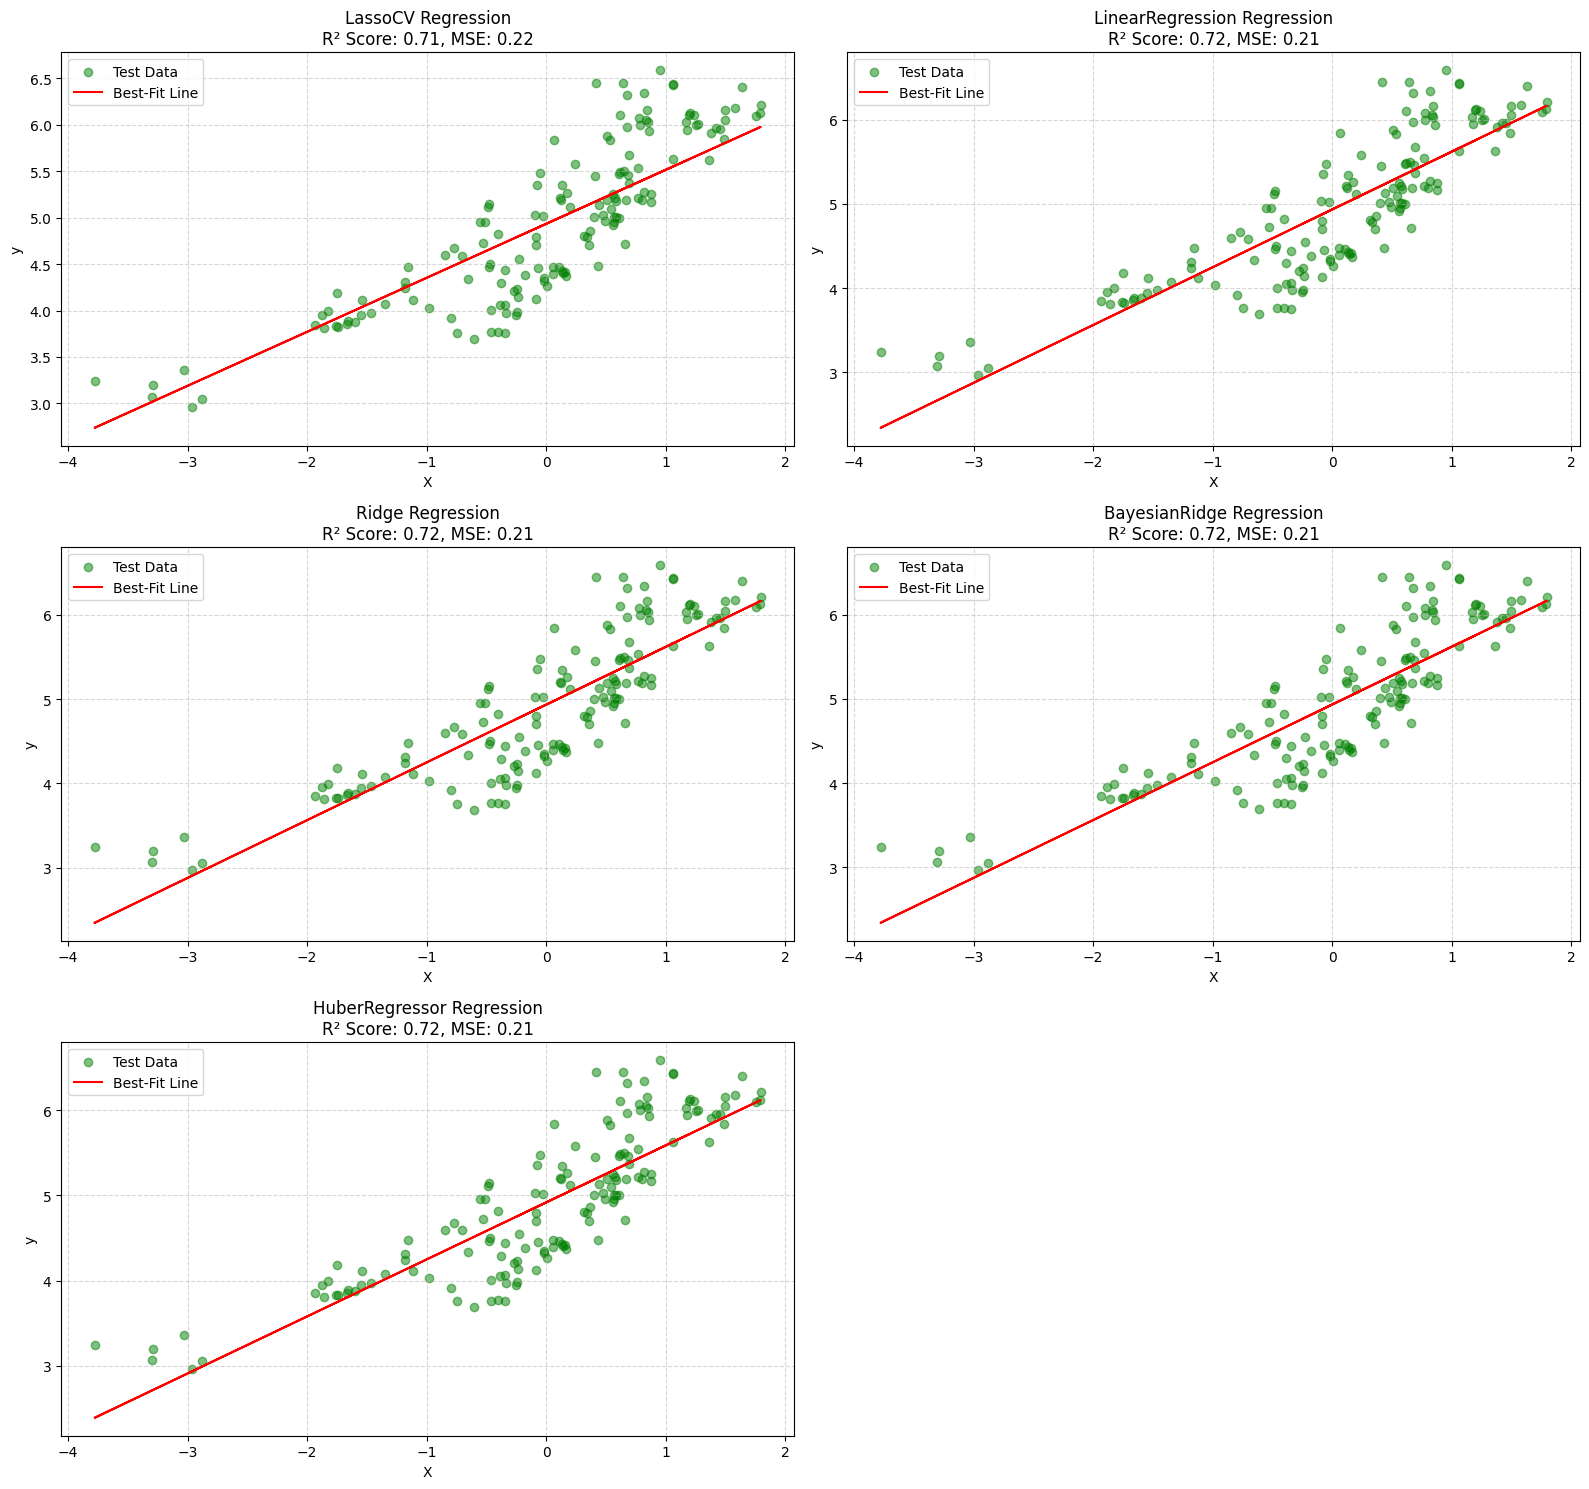

In [48]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 15))
# Flatten the axes to loop through them
axes = axes.flatten()

# For loop to train and plot each model
for i, (model_name, (model, param_grid)) in enumerate(models.items()):
    # Create a grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Get the best model with the tuned hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best model on the entire training data
    best_model.fit(X_train, y_train)
    
    # Predicting with the model
    y_pred = best_model.predict(X_test)
    
    # Calculating R-squared
    r2 = r2_score(y_test, y_pred)
    # Calculating Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Scatter plot of the test dataset
    axes[i].scatter(X_test, y_test, c='g', label='Test Data', alpha=0.5)
    # Predicting the best-fit line
    axes[i].plot(X_test, y_pred, c='r', label='Best-Fit Line')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].set_title(f"{model_name} Regression\nR² Score: {r2:.2f}, MSE: {mse:.2f}")
    axes[i].grid(True, ls='--', alpha=0.5)
    axes[i].legend()

for j in range(len(models), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Although we have applied the best hyperparameters and plotted the best-fit line, it appears that the optimal fit has not been achieved. As a next step, we will explore the utilization of polynomial features to enhance the accuracy of the best-fit line.**

#### PLOTTING BEST FIT LINE USING POLYNOMIAL FEATURES

In [49]:
# Degrees for polynomial features
degrees = [1, 2, 3, 4]

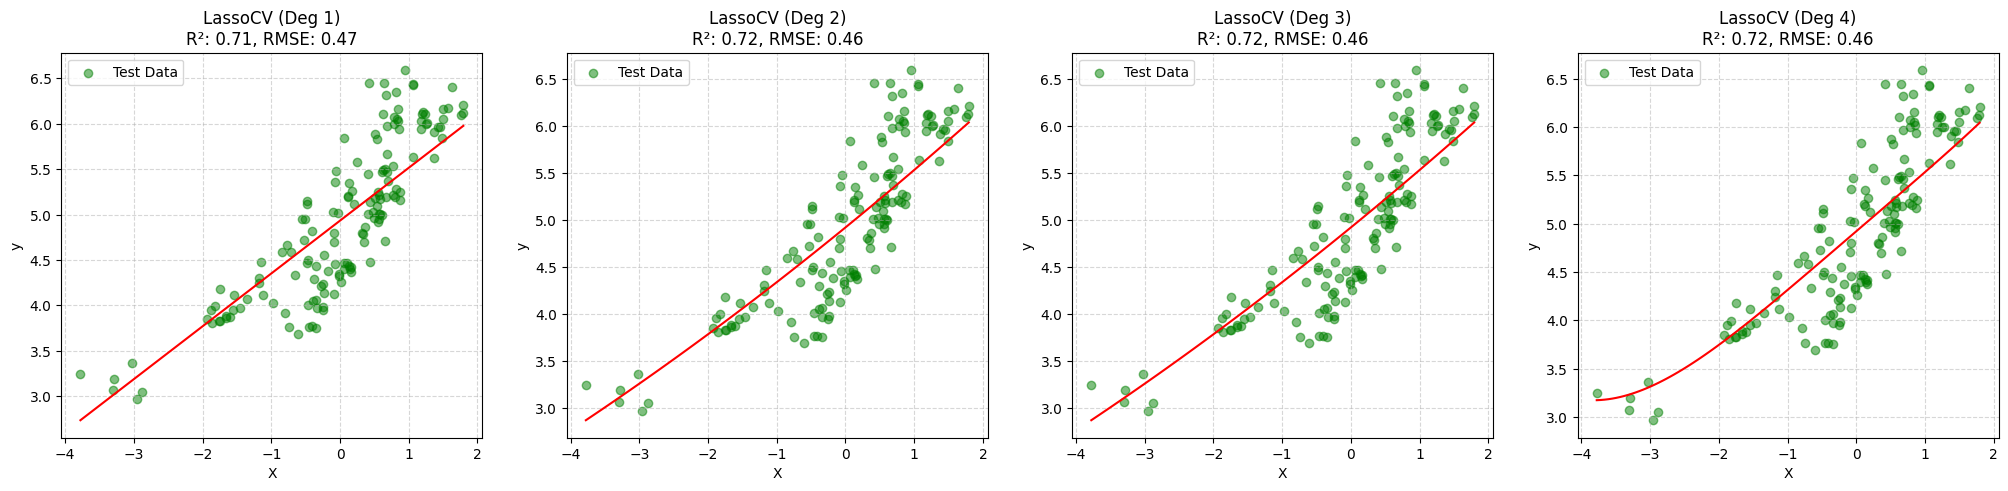

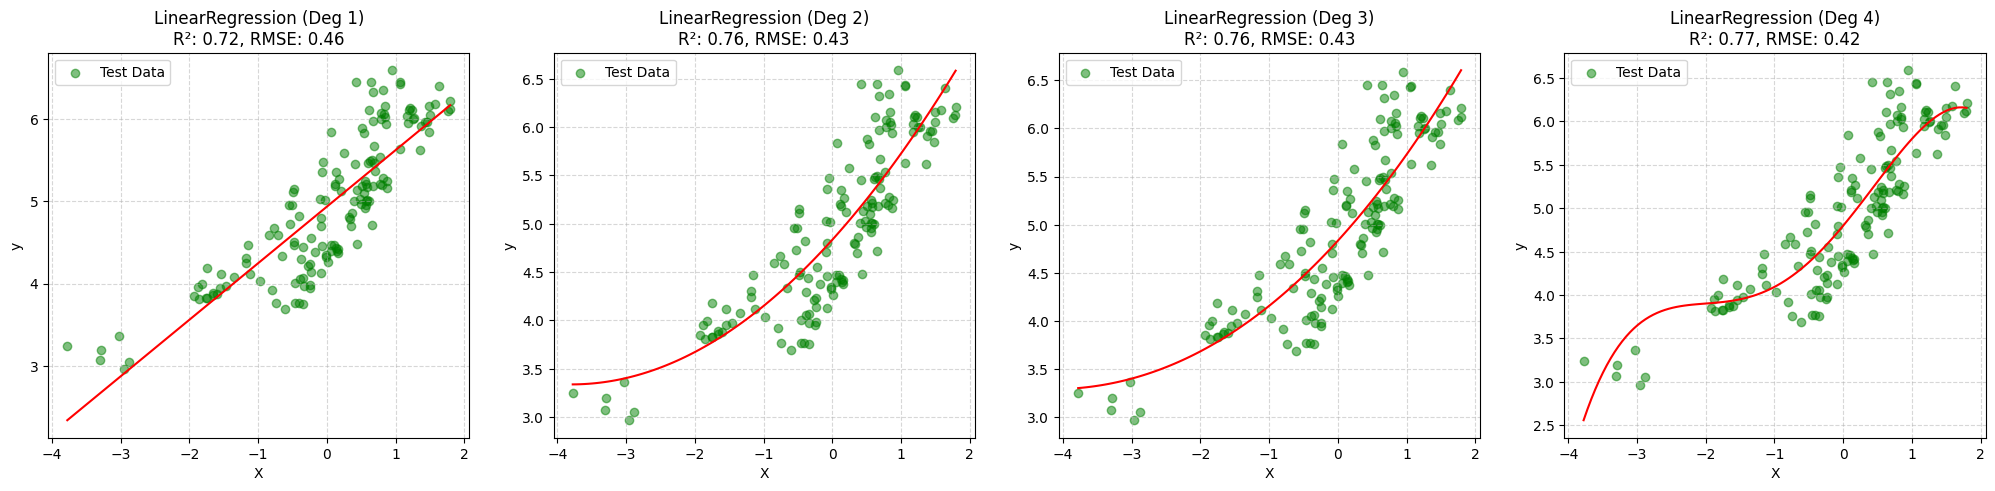

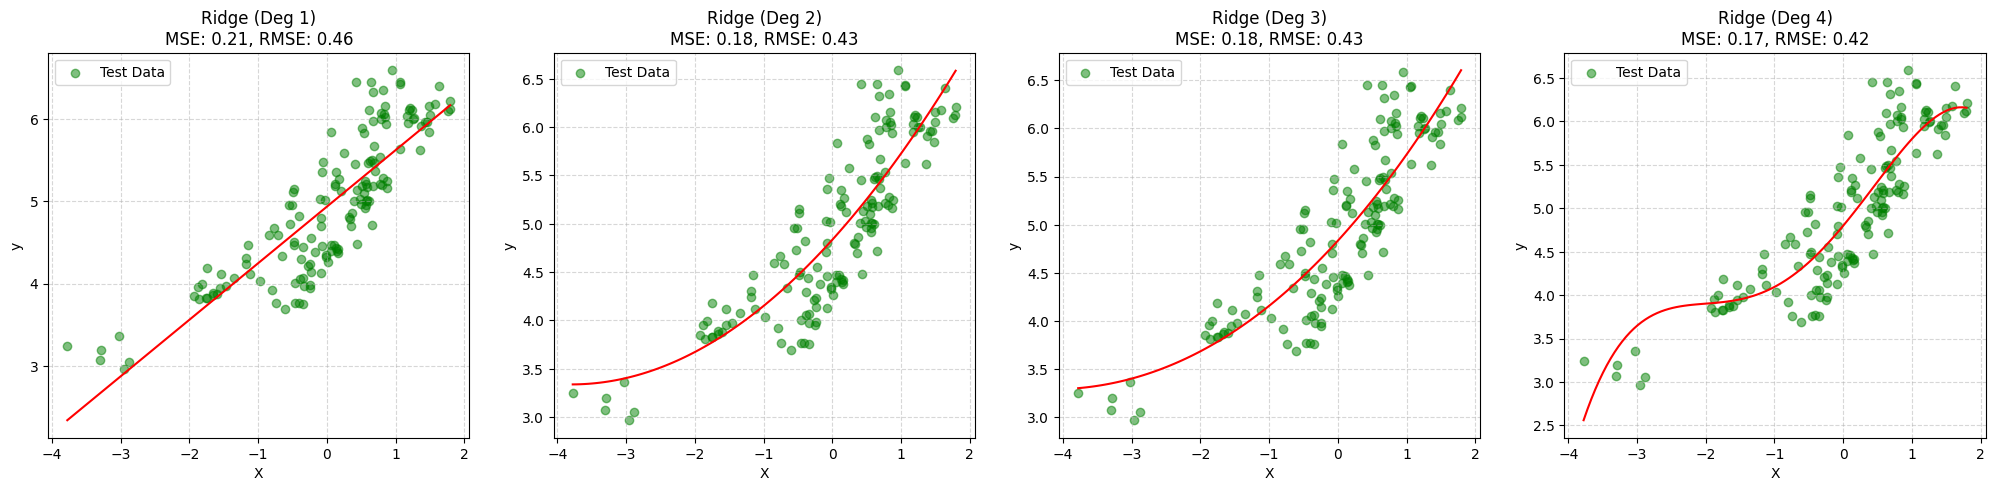

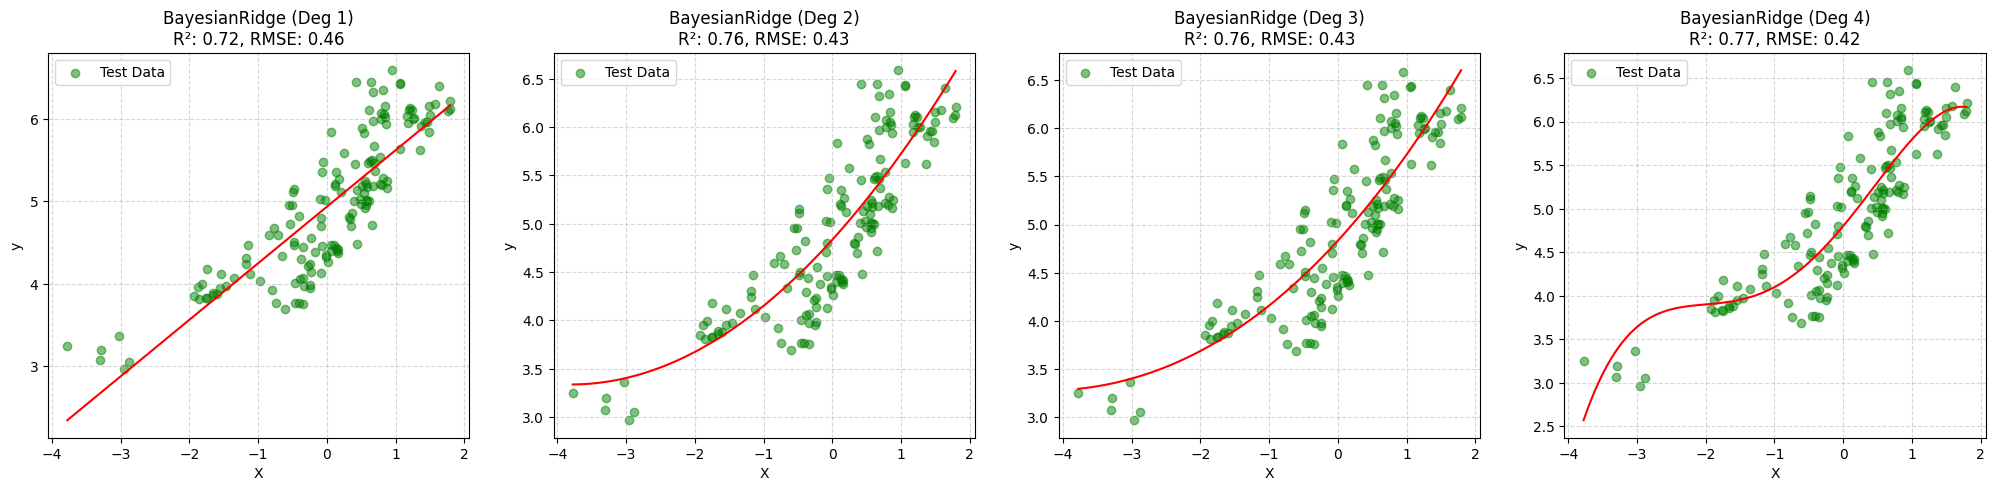

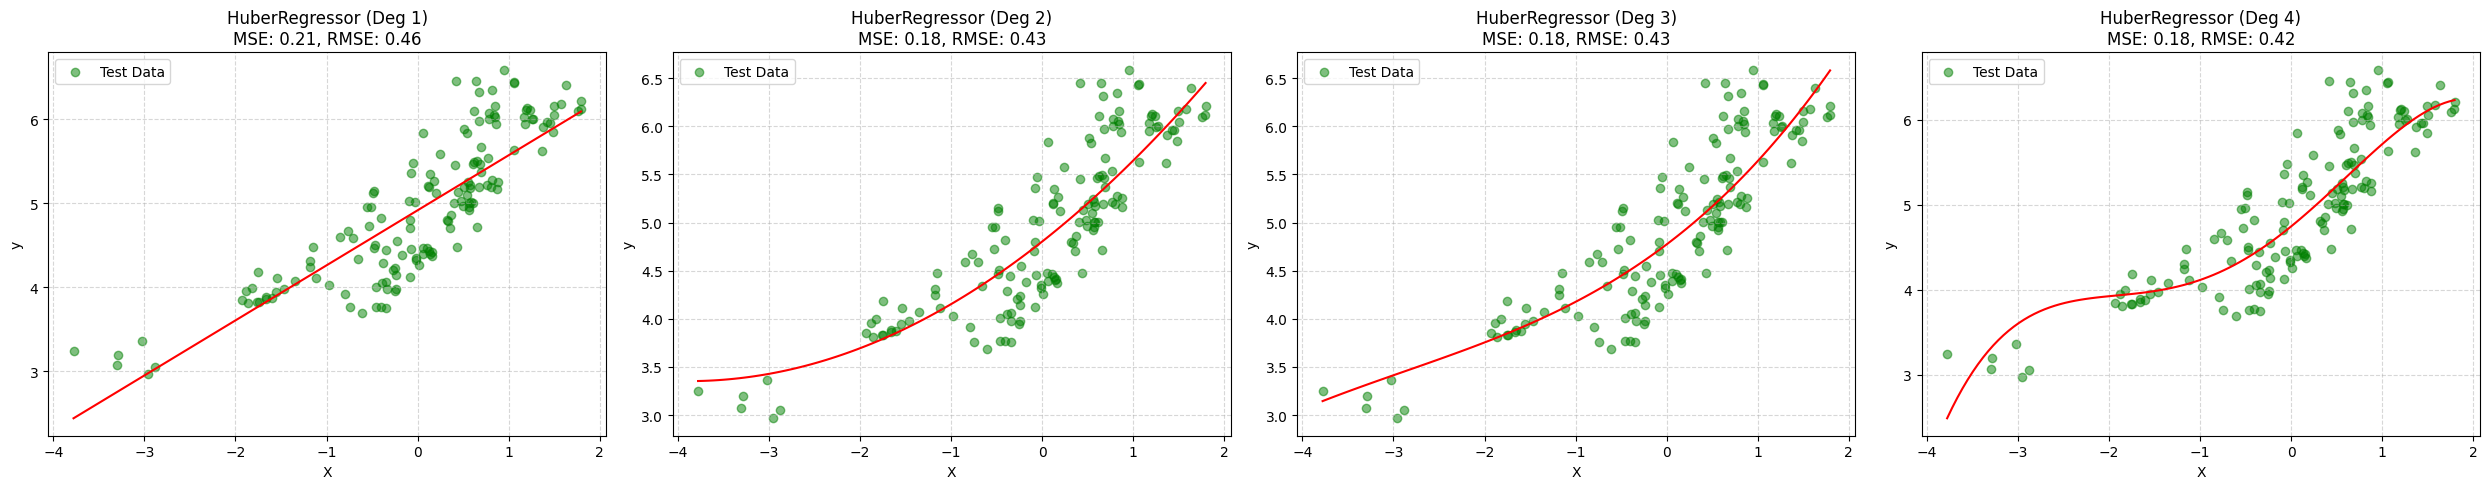

In [50]:
# Create an empty list to store the data 
results = []

# Loop through each model
for model_name, model_params in models.items():
    model = model_params[0]
    param_grid = model_params[1]

    fig, axes = plt.subplots(1, len(degrees), figsize=(25, 5))
    for degree_index, degree in enumerate(degrees):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X_train)

        if "alpha" in param_grid:
            # Check if the 'alpha' key exists in the hyperparameter grid
            # If it exists, perform a penalty (alpha) search
            alphas_range = param_grid['alpha']
            mse_values = []

            for alpha in alphas_range:
                model.set_params(**{'alpha': alpha})  # Set the alpha hyperparameter
                model.fit(X_poly, y_train)
                y_pred = model.predict(X_poly)
                mse = mean_squared_error(y_train, y_pred)
                mse_values.append(mse)

            # Find the best alpha based on minimum MSE
            best_alpha = alphas_range[np.argmin(mse_values)]
            mses = mse_values
        else:
            # If 'alpha' key doesn't exist, set alpha search results to None
            best_alpha = None
            mses = None

        # Scatter plot of the test dataset
        axes[degree_index].scatter(X_test, y_test, c='g', label='Test Data', alpha=0.5)

        # Create a range of x values for plotting the polynomial curve
        x_curve = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
        x_curve_poly = poly.transform(x_curve)

        # Train a model with the best alpha (for models with alpha search) or the default alpha (for others)
        if "alpha" in param_grid:
            model.set_params(**{'alpha': best_alpha})
        best_model = model
        best_model.fit(X_poly, y_train)

        # Predict the values for the polynomial curve
        y_curve = best_model.predict(x_curve_poly)

        # Calculate R-squared (R²), RMSE, and MSE
        X_test_poly = poly.transform(X_test)
        y_pred = best_model.predict(X_test_poly)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Plot the polynomial curve
        axes[degree_index].plot(x_curve, y_curve, c='r')
        axes[degree_index].set_xlabel('X')
        axes[degree_index].set_ylabel('y')

        if "alpha" in param_grid:
            axes[degree_index].set_title(f"{model_name} (Deg {degree})\nMSE: {mse:.2f}, RMSE: {rmse:.2f}")
        else:
            axes[degree_index].set_title(f"{model_name} (Deg {degree})\nR²: {r2:.2f}, RMSE: {rmse:.2f}")
        axes[degree_index].grid(True, ls='--', alpha=0.5)
        axes[degree_index].legend()

        # Append the results to the list
        results.append([model_name, degree, r2, rmse, mse])

plt.tight_layout()
plt.show()

**After experimenting with polynomial features ranging from degree 1 to degree 4, we've arrived at several polynomial fits. While some exhibit underfitting and others overfitting, it's evident that degree 2 and degree 3 polynomial features provide the most promising results.**

In [51]:
# Create the scores DataFrame by concatenating the list of data
scores_df = pd.DataFrame(results, columns=['Model Name', 'Degree', 'R-squared', 'RMSE', 'MSE'])
scores_df

Model Name  Degree  R-squared      RMSE       MSE
0            LassoCV       1   0.709860  0.467796  0.218833
1            LassoCV       2   0.719081  0.460302  0.211878
2            LassoCV       3   0.719081  0.460302  0.211878
3            LassoCV       4   0.721777  0.458089  0.209845
4   LinearRegression       1   0.724901  0.455509  0.207489
5   LinearRegression       2   0.759824  0.425616  0.181149
6   LinearRegression       3   0.759814  0.425624  0.181156
7   LinearRegression       4   0.769440  0.417008  0.173896
8              Ridge       1   0.724904  0.455507  0.207487
9              Ridge       2   0.759825  0.425615  0.181148
10             Ridge       3   0.759815  0.425624  0.181155
11             Ridge       4   0.769459  0.416991  0.173881
12     BayesianRidge       1   0.724913  0.455500  0.207480
13     BayesianRidge       2   0.759831  0.425609  0.181143
14     BayesianRidge       3   0.759817  0.425622  0.181154
15     BayesianRidge       4   0.769583  0.416879  0.173788
16    HuberRegressor       1   0.723636  0.456555  0.208443
17    HuberRegressor       2   0.757727  0.427470  0.182731
18    HuberRegressor       3   0.756113  0.428891  0.183948
19    HuberRegressor       4   0.766821  0.419370  0.175871

For most models, as the polynomial degree increases from 1 to 4, the R-squared value generally improves. This suggests better data fitting.

The RMSE and MSE values tend to decrease with higher polynomial degrees, indicating improved prediction accuracy.

Notably, the choice of the best polynomial degree depends on a trade-off between fit and overfitting. Degrees 2 and 3 appear to yield the most favorable balance between fit and complexity for most models.

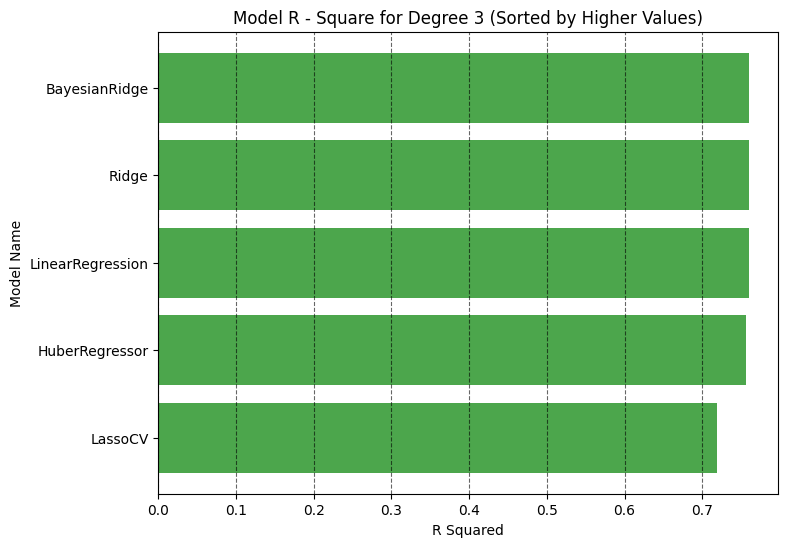

In [52]:
# Filter the DataFrame to include only rows with Degree equal to 3
scores_df = scores_df[scores_df['Degree'] == 3]

# Sort the DataFrame by higher 'R-squared' values
scores_df = scores_df.sort_values(by='R-squared', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
y = scores_df['Model Name']
x = scores_df['R-squared']
ax.barh(y, x, align='center', color='green', alpha=0.7)
ax.invert_yaxis()
ax.set_xlabel('R Squared')
ax.set_ylabel('Model Name')
ax.set_title('Model R - Square for Degree 3 (Sorted by Higher Values)')
ax.xaxis.grid(True, linestyle='--', alpha=0.6, color='black')
plt.show()

## Polynomial Regression Equation

#### **y = β₀ + β₁X + β₂X² + β₃X³**

The equation presented is a representation of a polynomial regression model. In polynomial regression, we aim to model the relationship between the dependent variable (usually denoted as "y") and one or more independent variables (typically denoted as "X"), where the relationship is expressed as a polynomial function.

- **y**: This is the dependent variable we want to predict or explain. It could represent various things, such as sales, temperature, or any other measurable outcome.
- **β₀ (Beta Subscript Zero)**: This is the intercept or constant term of the polynomial regression model. It represents the value of "y" when all the independent variables (X) are equal to zero.
- **β₁ (Beta Subscript One)**: This is the coefficient of the first-degree term of the polynomial, which is a linear term. It quantifies the impact of the first-degree (linear) independent variable "X" on the dependent variable "y."

- **β₂ (Beta Subscript Two)**: This represents the coefficient of the second-degree term of the polynomial, a quadratic term. It quantifies the impact of the quadratic relationship between "X" and "y."
- **β₃ (Beta Subscript Three)**: This is the coefficient of the third-degree term of the polynomial, a cubic term. It quantifies the impact of the cubic relationship between "X" and "y."
-  **Degree (3)**: The degree of the polynomial indicates that we're considering polynomial terms up to the power of 3. This includes a linear term (X¹), a quadratic term (X²), and a cubic term (X³). The degree defines how flexible the model is in capturing complex, nonlinear relationships in the data.

In essence, this equation allows us to model more complex relationships between "X" and "y" than simple linear regression (where the equation is y = β₀ + β₁X). In polynomial regression, we're considering the influence of "X" not just linearly, but also quadratically and cubically. This flexibility can be particularly useful when the underlying relationship between variables is nonlinear.

By adjusting the values of β₀, β₁, β₂, and β₃, the polynomial regression model can be fine-tuned to best fit the data, enabling better predictions and a more comprehensive understanding of the relationship between the variables.

In [53]:
# Number of columns and rows
n_cols = 2
n_rows = 4

In [54]:
# Degrees for polynomial features
degrees = [3]

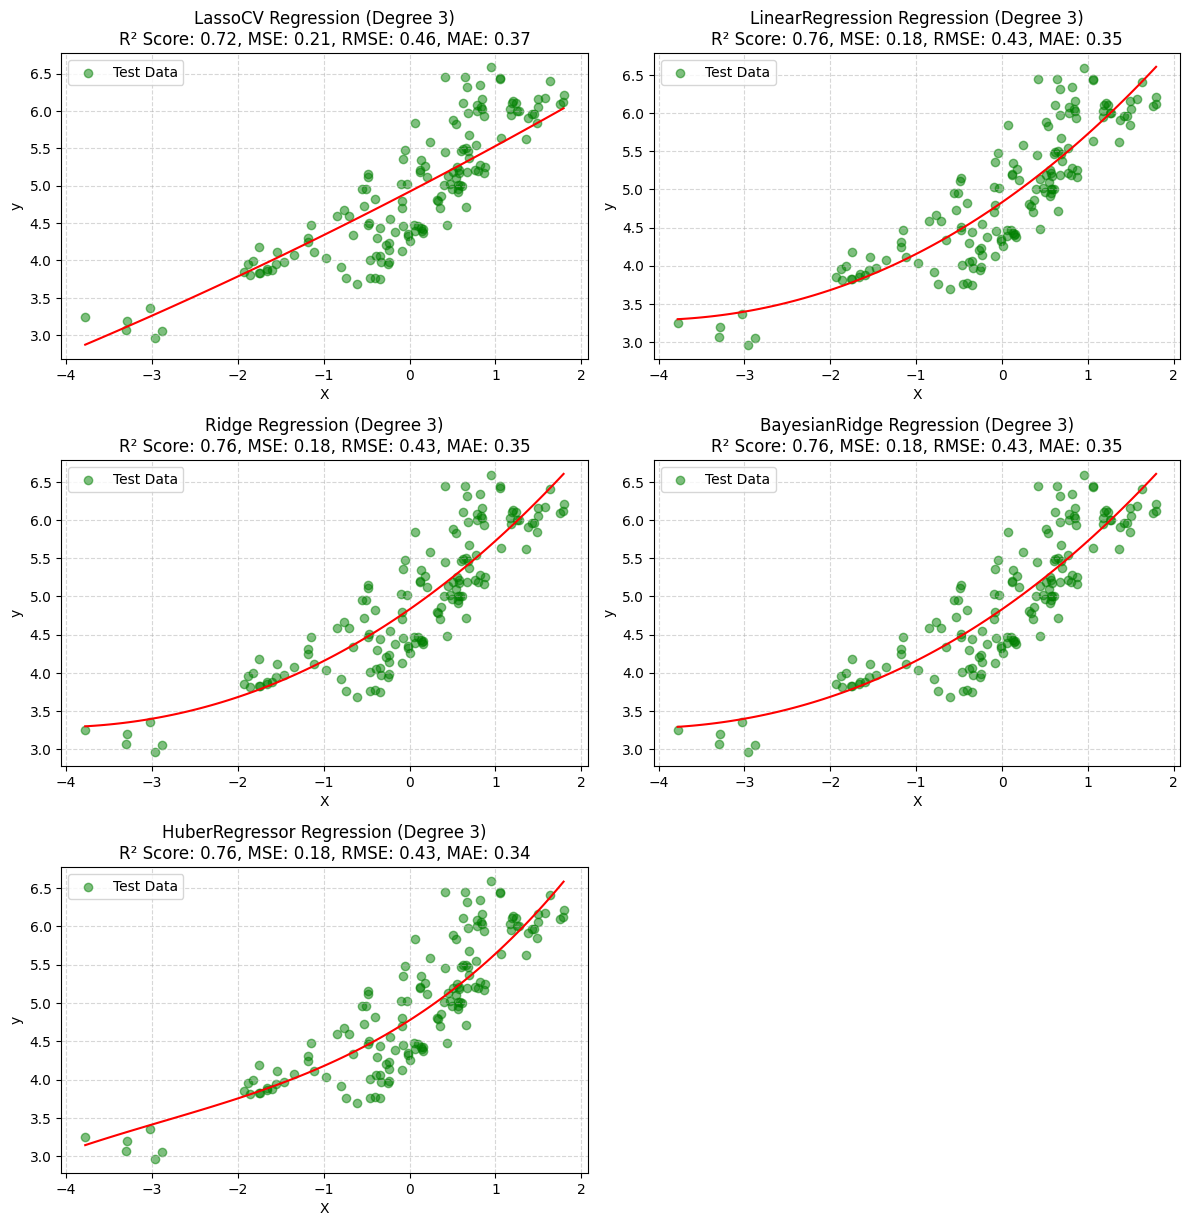

In [55]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 16))
# Flatten the axes to loop through them
axes = axes.flatten()

# empty list to store the data for the DataFrame
result_for_polynomial_degree_three = []

for i, (model_name, model_params) in enumerate(models.items()):
    model = model_params[0]
    param_grid = model_params[1]
    
    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X_train)

        # Train a linear regression model on the polynomial features
        model.fit(X_poly, y_train)

        # Transform the test data and predict with the model
        X_test_poly = poly.transform(X_test)
        y_pred = model.predict(X_test_poly)

        # Calculating R-squared
        r2 = r2_score(y_test, y_pred)
        # Calculating Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        # Calculating Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        # Calculating Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        # Append the scores to result_for_polynomial_degree_three
        result_for_polynomial_degree_three.append([model_name, degree, r2, mse, rmse, mae])

        # Scatter plot of the test dataset
        axes[i].scatter(X_test, y_test, c='g', label='Test Data', alpha=0.5)

        # Create a range of x values for plotting the polynomial curve
        x_curve = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
        x_curve_poly = poly.transform(x_curve)

        # Predict the values for the polynomial curve
        y_curve = model.predict(x_curve_poly)

        # Plot the polynomial curve
        axes[i].plot(x_curve, y_curve, c='r')
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('y')
        axes[i].set_title(f"{model_name} Regression (Degree {degree})\nR² Score: {r2:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        axes[i].grid(True, ls='--', alpha=0.5)
        axes[i].legend()

for j in range(len(models), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Exploring Polynomial Degree 3

In our quest to create a highly accurate predictive model

Let's walk through the stages of our exploration:

##### 1. Polynomial Degree Selection

We've opted for a polynomial degree of three. This choice allows us to embrace the intricacies of the data by considering linear, quadratic, and cubic relationships, making it a flexible and powerful option.

##### 2. Visualizing the Best Fit Line

To get a deeper understanding, we've visualized the best fit line, which incorporates the selected polynomial features. This visualization helps us see how the model is capturing the data's complexity.

##### 3. Model Evaluation

Our pursuit of excellence doesn't stop at visualization. We've rigorously evaluated our polynomial regression models, meticulously examining their performance. 

##### 4. The Quest for the Optimal Model

Now, we stand at the threshold of selecting the optimal model using model evaluation metrics.

In [56]:
#scores DataFrame 
scores_df = pd.DataFrame(result_for_polynomial_degree_three, columns=['Model Name', 'Degree', 'R-squared', 'MSE', 'RMSE', 'MAE'])
scores_df

Model Name  Degree  R-squared       MSE      RMSE       MAE
0           LassoCV       3   0.719081  0.211878  0.460302  0.367319
1  LinearRegression       3   0.759814  0.181156  0.425624  0.347788
2             Ridge       3   0.759815  0.181155  0.425624  0.347738
3     BayesianRidge       3   0.759817  0.181154  0.425622  0.347283
4    HuberRegressor       3   0.756113  0.183948  0.428891  0.338866

#### SELECTING BEST MODEL (LINEAR REGRESSION)

In [57]:
#Independent Variable
X = ftse['Close'].values.reshape(-1, 1)
#Dependent Variable
y = hsbc['Close'].values

In [58]:
y = y[:len(X)]
# X = (X - X.mean())/ X.std()

In [59]:
#Train size 70 percent 
#Test size 30 percent 
#random state is zero
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [60]:
#the degree of the polynomial features
degree = 3

In [61]:
#poly features
poly = PolynomialFeatures(degree=degree, include_bias=False)

In [62]:
#polynomial feature transformation on the training data
X_poly_train = poly.fit_transform(X_train)
#polynomial feature transformation to the test data
X_poly_test = poly.transform(X_test)


In [63]:
#LinearRegression model
regressor = LinearRegression(n_jobs=-1)

In [64]:
#Fitting & Training Model
regressor.fit(X_poly_train, y_train)

LinearRegression(n_jobs=-1)

In [65]:
# Predict on the test set
y_pred = regressor.predict(X_poly_test)

In [66]:
# Sort the test data for smoother curve plotting
X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test, y_pred)))

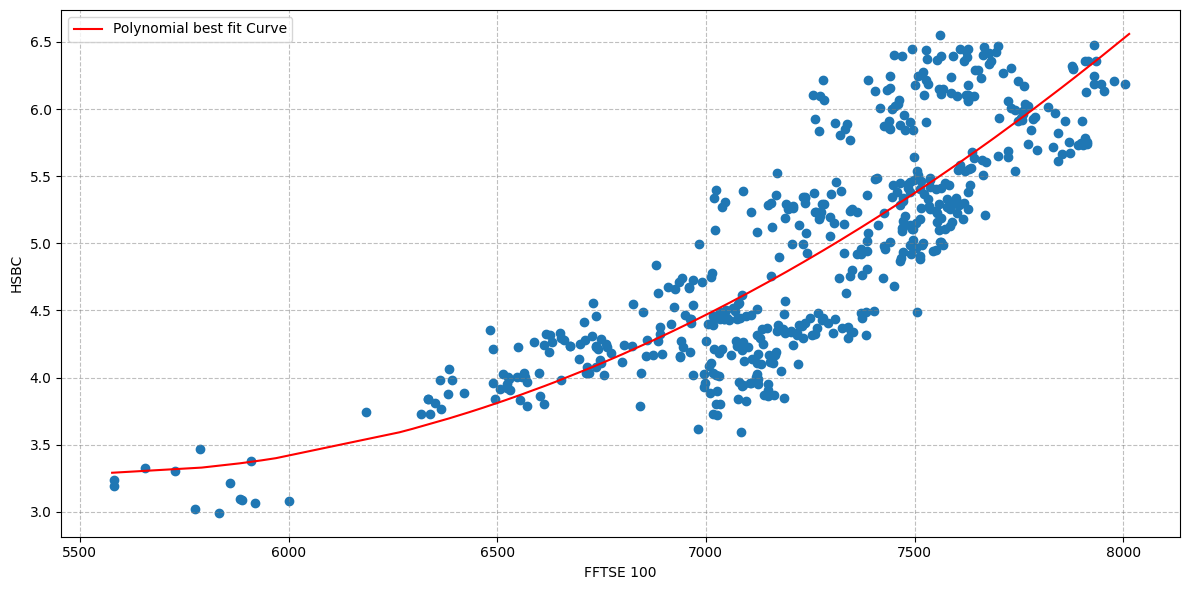

In [67]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_test_sorted, y_pred_sorted, c='r', label='Polynomial best fit Curve')
plt.xlabel('FFTSE 100')
plt.ylabel('HSBC')
plt.legend()
plt.tight_layout()
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

In [68]:
#Let say random price values for ftse100
ftse_100_values = [10000, 9000, 8000, 7000, 6000, 5000, 9874, 8456, 6512, 5005]
for i, price in enumerate(ftse_100_values, start=1):
    print(f"{i}: FTSE 100: £{price}")

1: FTSE 100: £10000
2: FTSE 100: £9000
3: FTSE 100: £8000
4: FTSE 100: £7000
5: FTSE 100: £6000
6: FTSE 100: £5000
7: FTSE 100: £9874
8: FTSE 100: £8456
9: FTSE 100: £6512
10: FTSE 100: £5005


In [69]:
ftse_100_random_test = np.array(ftse_100_values).reshape(-1, 1)

In [70]:
#polynomial feature transformation to the random test data
random_test_data_poly = poly.transform(ftse_100_random_test)

#Predict the prices for the random test data
predicted_prices = regressor.predict(random_test_data_poly)

for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for HSBC {i + 1}: £{price:.2f}")

Predicted Price for HSBC 1: £13.34
Predicted Price for HSBC 2: £9.51
Predicted Price for HSBC 3: £6.52
Predicted Price for HSBC 4: £4.47
Predicted Price for HSBC 5: £3.41
Predicted Price for HSBC 6: £3.44
Predicted Price for HSBC 7: £12.82
Predicted Price for HSBC 8: £7.77
Predicted Price for HSBC 9: £3.82
Predicted Price for HSBC 10: £3.44


#### CHECKING OVER FITTING 

In [71]:
#R-squared score
r2_test = r2_score(y_test, y_pred)

#Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)

#Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse)

#Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_pred)

In [72]:
print(f'R-squared score: {r2_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')

R-squared score: 0.7223
Mean Squared Error (MSE): 0.1937
Root Mean Squared Error (RMSE): 0.4289
Mean Absolute Error (MAE): 0.3592


In [73]:
y_pred_train = regressor.predict(X_poly_train)

In [74]:
# Calculate R-squared score for training data
r2_train = r2_score(y_train, y_pred_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_pred_train)

In [75]:
print(f'R-squared (R²) score (Training Data): {r2_train:.4f}')
print(f'Mean Squared Error (MSE) (Training Data): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE) (Training Data): {rmse_train:.4f}')
print(f'Mean Absolute Error (MAE) (Training Data): {mae_train:.4f}')


R-squared (R²) score (Training Data): 0.7037
Mean Squared Error (MSE) (Training Data): 0.2056
Root Mean Squared Error (RMSE) (Training Data): 0.4534
Mean Absolute Error (MAE) (Training Data): 0.3653


Based on the performance metrics for both the test data and training data, it does not appear that your model is significantly overfitting. The R-squared (R²) scores for both the test data (0.71) and training data (0.70) are relatively close, indicating that the model is performing reasonably well on both datasets. Additionally, the values for Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) are similar between the test and training datasets.

In general, overfitting is more likely to occur when there is a substantial difference between the performance metrics on the training data and test data. If the model had a significantly higher R² score or lower error metrics on the training data compared to the test data, it would suggest overfitting. However, in your case, the differences are relatively small, which is a positive sign.


### VISUAL ANALYSIS FOR OVER FITTING 

##### TEST DATASET

In [76]:
df_result_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [77]:
df_result_test[:10]

Actual  Predicted
0  6.1100   5.921314
1  5.9730   5.427778
2  4.8590   5.153217
3  3.8855   3.814147
4  5.1160   4.492181
5  4.1155   3.870284
6  6.0530   5.573479
7  3.8480   3.696007
8  6.4410   5.788850
9  4.3805   4.718637

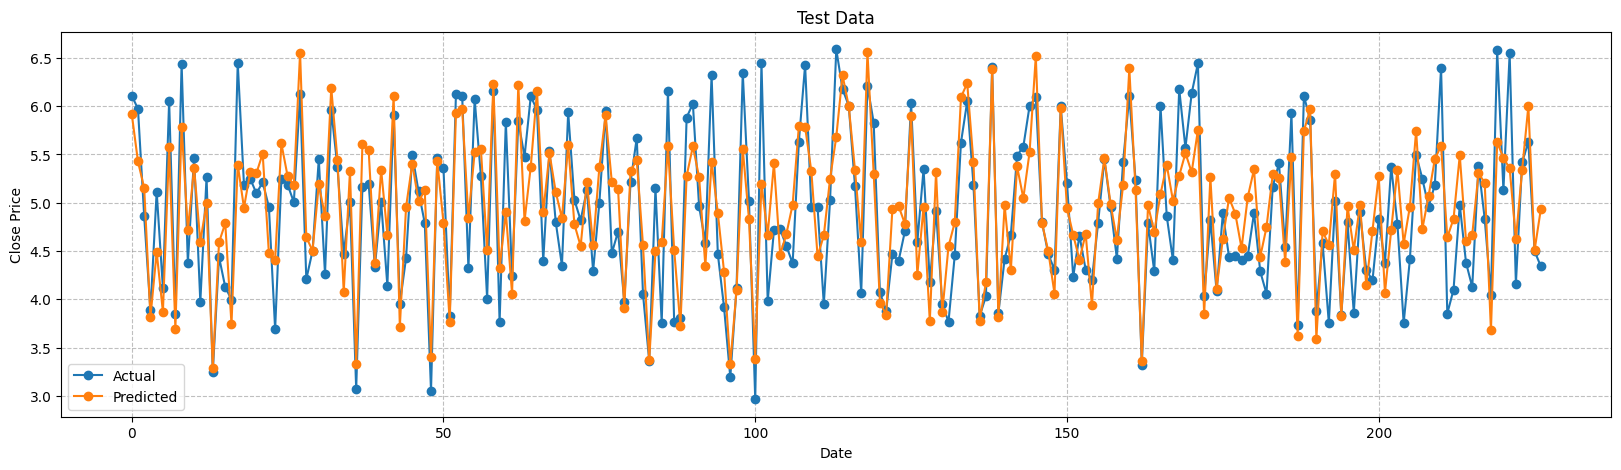

In [78]:
fig, ax = plt.subplots(figsize=(20, 5))
df_result_test.plot(ax=ax, marker='o')  
ax.grid(True, ls='--', color='grey', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Test Data')
plt.show()

In [79]:
df_result_test['Differrence'] = df_result_test['Actual'] - df_result_test['Predicted']

In [80]:
df_result_test[:10]

Actual  Predicted  Differrence
0  6.1100   5.921314     0.188686
1  5.9730   5.427778     0.545222
2  4.8590   5.153217    -0.294217
3  3.8855   3.814147     0.071353
4  5.1160   4.492181     0.623819
5  4.1155   3.870284     0.245216
6  6.0530   5.573479     0.479521
7  3.8480   3.696007     0.151993
8  6.4410   5.788850     0.652150
9  4.3805   4.718637    -0.338137

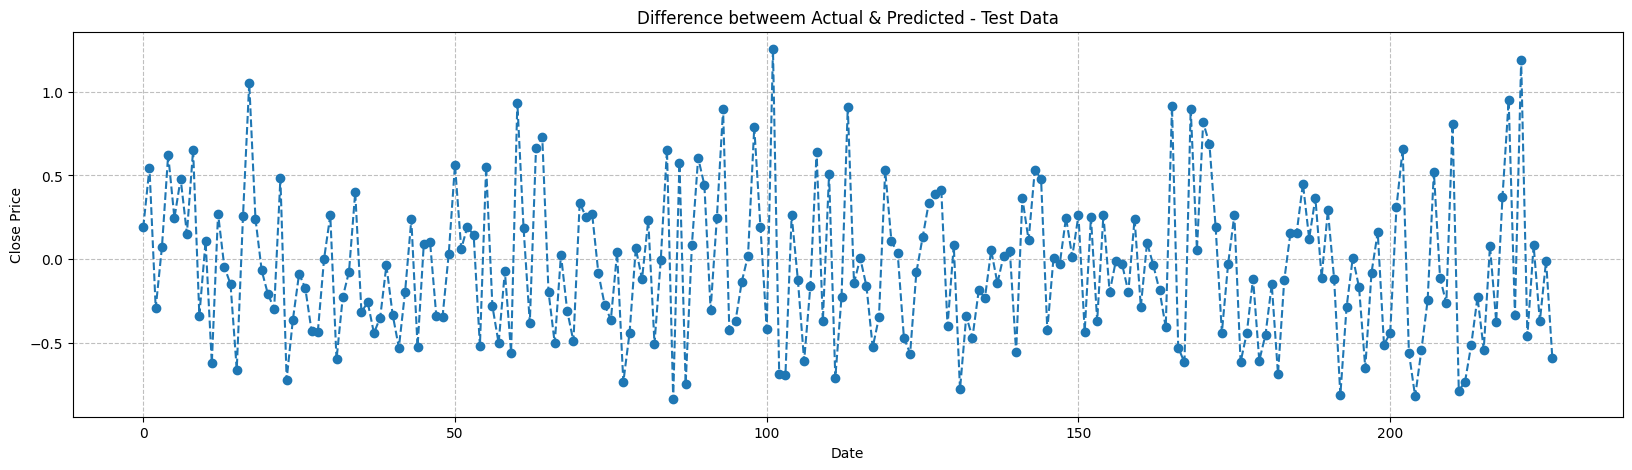

In [81]:
fig, ax = plt.subplots(figsize=(20, 5))
df_result_test['Differrence'].plot(ax=ax, marker='o', ls='--')
ax.grid(True, ls='--', color='grey', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Difference betweem Actual & Predicted - Test Data')
plt.show()

In [82]:
df_result_test.describe()

Actual   Predicted  Differrence
count  227.000000  227.000000   227.000000
mean     4.901311    4.949168    -0.047857
std      0.837095    0.704558     0.438491
min      2.966000    3.290633    -0.838431
25%      4.274500    4.538696    -0.378028
50%      4.859000    4.976578    -0.081423
75%      5.483500    5.407706     0.242060
max      6.590000    6.559180     1.254599

- **There is no significant change between Actual and Predicted data set.**

- **The minimum and maximum differences highlight the range of prediction errors the model can make. The model performs worst when underestimating by approximately -0.8384 but can also overestimate by up to 1.2546.**

##### TRAIN DATASET

In [83]:
y_pred_train = regressor.predict(X_poly_train)

In [84]:
df_result_train = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred_train
})

In [85]:
df_result_train[:10]

Actual  Predicted
0   5.964   5.944359
1   6.158   5.252474
2   4.950   5.481672
3   3.966   4.592431
4   5.190   5.506842
5   6.450   5.645851
6   5.505   5.392893
7   3.190   3.290982
8   4.493   4.577009
9   3.842   4.590293

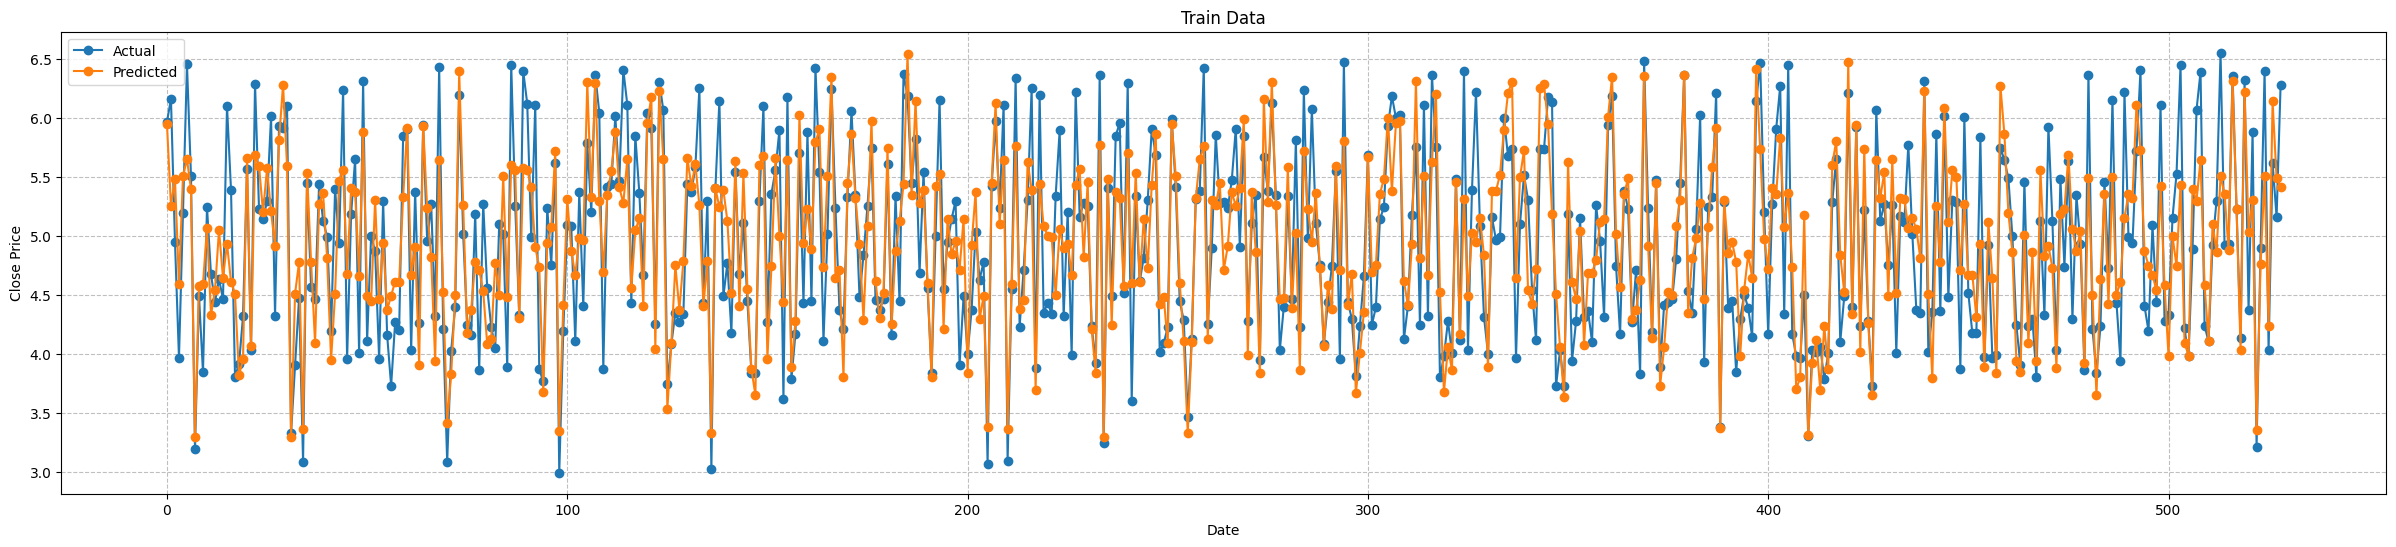

In [86]:
fig, ax = plt.subplots(figsize=(30, 6))
df_result_train.plot(ax=ax, marker='o')  
ax.grid(True, ls='--', color='grey', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Train Data')
plt.show()

In [87]:
df_result_train['Differrence'] = df_result_train['Actual'] - df_result_train['Predicted']

In [88]:
df_result_train[:10]

Actual  Predicted  Differrence
0   5.964   5.944359     0.019641
1   6.158   5.252474     0.905526
2   4.950   5.481672    -0.531672
3   3.966   4.592431    -0.626431
4   5.190   5.506842    -0.316842
5   6.450   5.645851     0.804149
6   5.505   5.392893     0.112107
7   3.190   3.290982    -0.100982
8   4.493   4.577009    -0.084009
9   3.842   4.590293    -0.748293

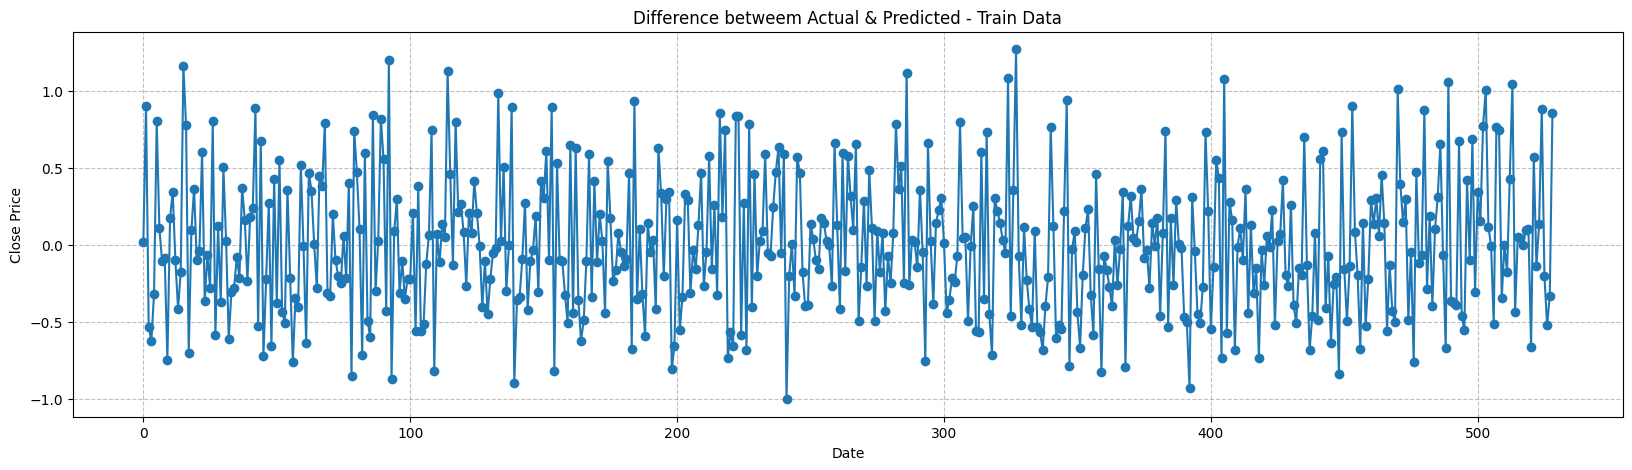

In [89]:
fig, ax = plt.subplots(figsize=(20, 5))
df_result_train['Differrence'].plot(ax=ax,marker='o')
ax.grid(True, ls='--', color='grey', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Difference betweem Actual & Predicted - Train Data')
plt.show()

In [90]:
df_result_train.describe()

Actual   Predicted   Differrence
count  529.000000  529.000000  5.290000e+02
mean     4.947696    4.947696  5.057916e-14
std      0.833732    0.699375  4.538544e-01
min      2.992500    3.290916 -1.003170e+00
25%      4.250000    4.495033 -3.403463e-01
50%      4.977000    4.944139 -3.209198e-02
75%      5.582000    5.449092  2.958917e-01
max      6.549000    6.534016  1.273753e+00

- **The model's predictions closely match the actual values, as indicated by the very close-to-zero mean difference.**
- **The standard deviation of the prediction errors is relatively low, suggesting consistent model performance.**
- **The minimum and maximum differences indicate the largest underestimation and overestimation errors made by the model.**
- **The quartiles show how the differences are distributed.**

### HETEROSCEDASTICITY TEST

![Alt text](image.png)

### Homoscedasticity and Heteroscedasticity

**Homoscedasticity** (or homogeneity of variance) and **Heteroscedasticity** (or heterogeneity of variance) are two terms used in regression analysis to describe the spread of residuals (errors) in a regression model:

- **Homoscedasticity** means that the variance of the residuals is approximately constant across different levels of the independent variable(s). In simpler terms, it indicates that the spread of residuals remains consistent, regardless of the values of the independent variables. Homoscedasticity is a desirable assumption in regression analysis as it ensures the validity of statistical tests and confidence intervals.

- **Heteroscedasticity** occurs when the variance of residuals is not constant and varies for different values of the independent variable(s). In this case, the spread of residuals changes across the range of independent variables. Heteroscedasticity can lead to issues in regression analysis, including invalid p-values and unreliable coefficient estimates.

**Impact:**

- In the presence of homoscedasticity, regression coefficients are still unbiased and efficient.

- Heteroscedasticity can result in biased coefficient estimates and may cause variables' significance to be either overestimated or underestimated.


In [91]:
from scipy import stats
from scipy.stats import norm
from scipy import stats

#### TEST DATASET

In [92]:
test_dataset = pd.DataFrame([])
test_dataset['y_test'] = y_test
test_dataset['y_pred'] = y_pred
test_dataset['residual_test'] = test_dataset['y_test'] - test_dataset['y_pred']

In [93]:
test_dataset[:5]

y_test    y_pred  residual_test
0  6.1100  5.921314       0.188686
1  5.9730  5.427778       0.545222
2  4.8590  5.153217      -0.294217
3  3.8855  3.814147       0.071353
4  5.1160  4.492181       0.623819

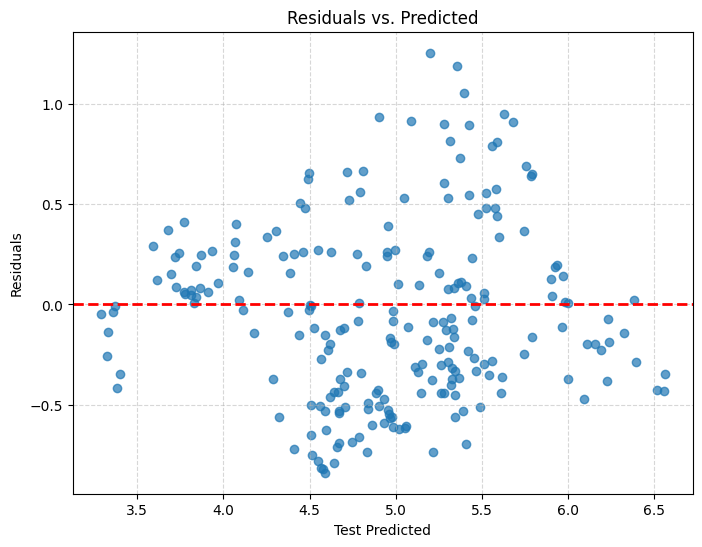

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(test_dataset['y_pred'], test_dataset['residual_test'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  
plt.title("Residuals vs. Predicted")
plt.xlabel("Test Predicted")
plt.ylabel("Residuals")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

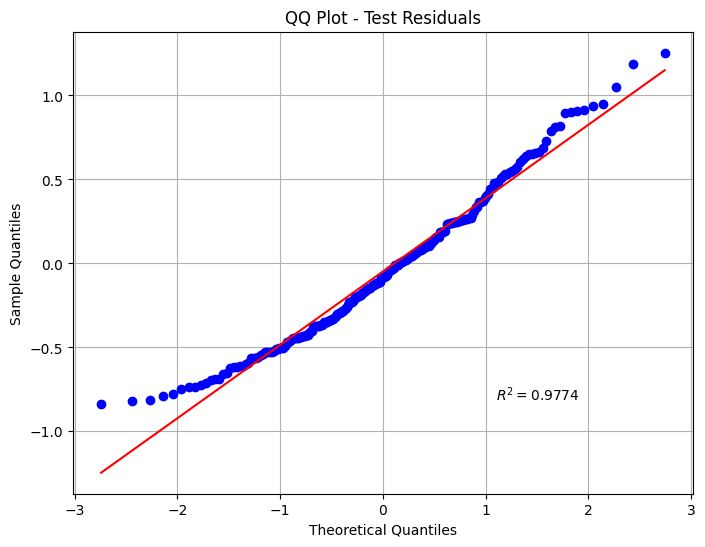

In [95]:
plt.figure(figsize=(8, 6))
# QQ plot for test residuals
residuals_test = test_dataset['residual_test']
# Create QQ plots for both test and train residuals
_, ax1 = stats.probplot(residuals_test, dist='norm', plot=plt, rvalue=True)
plt.title("QQ Plot - Test Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

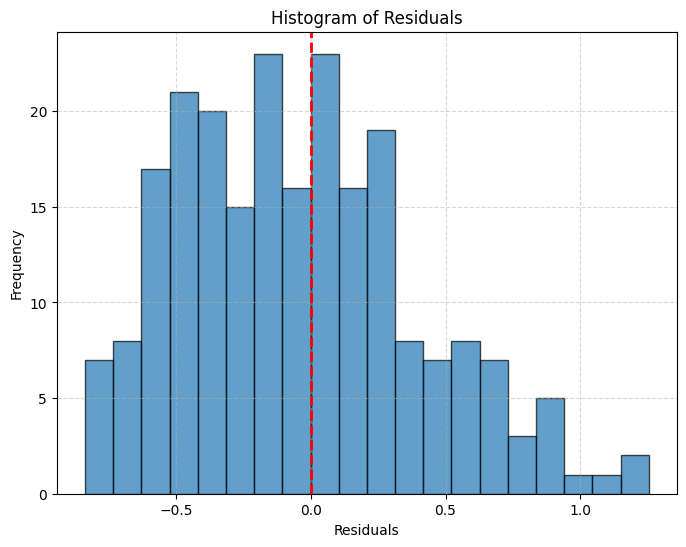

In [96]:
plt.figure(figsize=(8, 6))
plt.hist(test_dataset['residual_test'], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)  # Add a vertical line at x=0
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [97]:
# normal distribution curve
# mean of 'residual_test'
mean_residuals = np.mean(test_dataset['residual_test'])
#standard deviation of 'residual_test'
std_residuals = np.std(test_dataset['residual_test'])

#an array of 100 equally spaced values between the minimum and maximum of 'residual_test'
x = np.linspace(min(test_dataset['residual_test']), max(test_dataset['residual_test']), 100)

# probability density function (PDF) of a normal distribution for 'x'
# with the calculated mean and standard deviation
y = norm.pdf(x, mean_residuals, std_residuals)

In [98]:
#median and mean 'residual_test'
median_value = np.median(test_dataset['residual_test'])
mean_value = np.mean(test_dataset['residual_test'])

print("Median:", median_value)
print("Mean:", mean_value)

Median: -0.08142287570038143
Mean: -0.04785700415309351


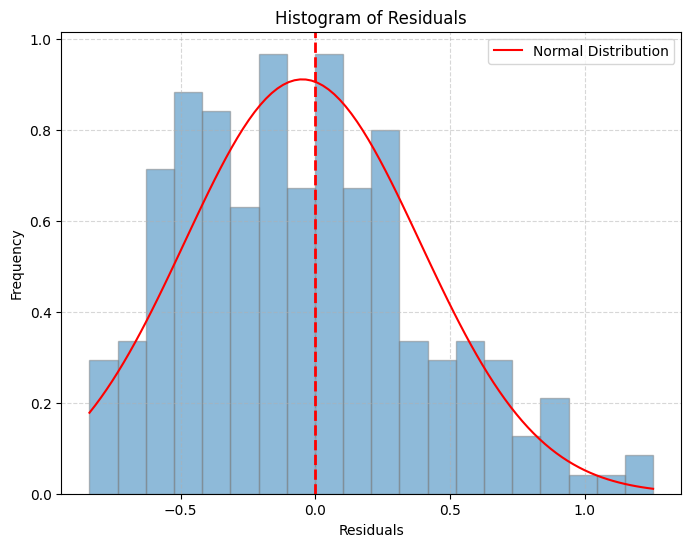

In [99]:
plt.figure(figsize=(8, 6))
#histogram of 'residual_test' 
plt.hist(test_dataset['residual_test'], bins=20, edgecolor='grey', alpha=0.5, density=True)
#normal distribution curve 
plt.plot(x, y, color='r', label='Normal Distribution')
#vertical line at x=0 in the histogram
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.show()

In [100]:
#skewness of the 'residual_test' column
skewness = test_dataset['residual_test'].skew()
print(f"Skewness of Residuals: {skewness:.4f}")

Skewness of Residuals: 0.5087


#### TRAIN DATASET

In [101]:
train_dataset = pd.DataFrame([])
train_dataset['y_train'] = y_train
train_dataset['y_pred_train'] = y_pred_train
train_dataset['residual_train'] = train_dataset['y_train'] - train_dataset['y_pred_train']

In [102]:
train_dataset[:5]

y_train  y_pred_train  residual_train
0    5.964      5.944359        0.019641
1    6.158      5.252474        0.905526
2    4.950      5.481672       -0.531672
3    3.966      4.592431       -0.626431
4    5.190      5.506842       -0.316842

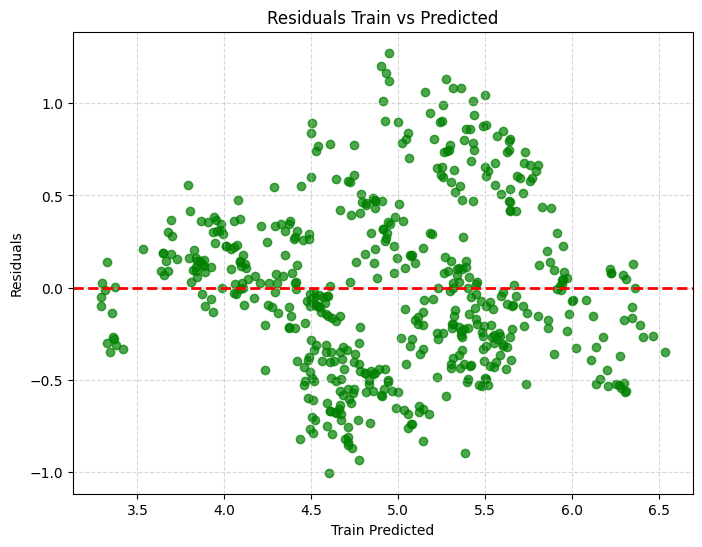

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(train_dataset['y_pred_train'], train_dataset['residual_train'], alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  
plt.title("Residuals Train vs Predicted")
plt.xlabel("Train Predicted")
plt.ylabel("Residuals")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

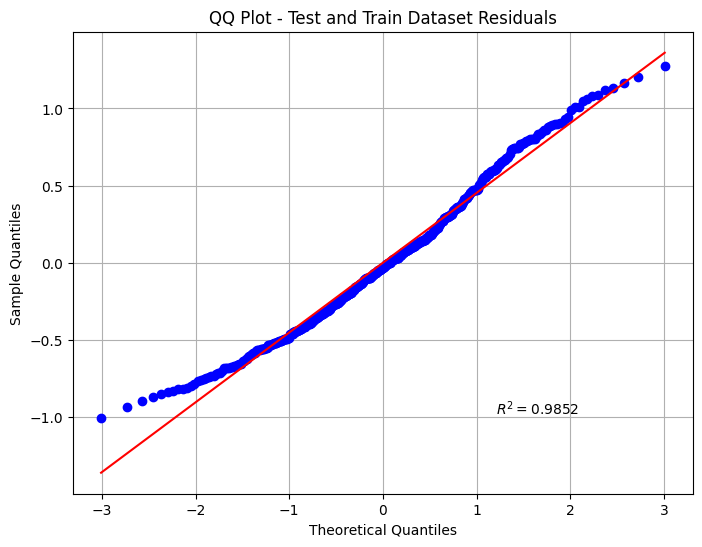

In [104]:
plt.figure(figsize=(8, 6))
# QQ plot for train residuals
residuals_train = train_dataset['residual_train']
# Create QQ plots for both test and train residuals
_, ax2 = stats.probplot(residuals_train, dist='norm', plot=plt, rvalue=True)
plt.title("QQ Plot - Test and Train Dataset Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

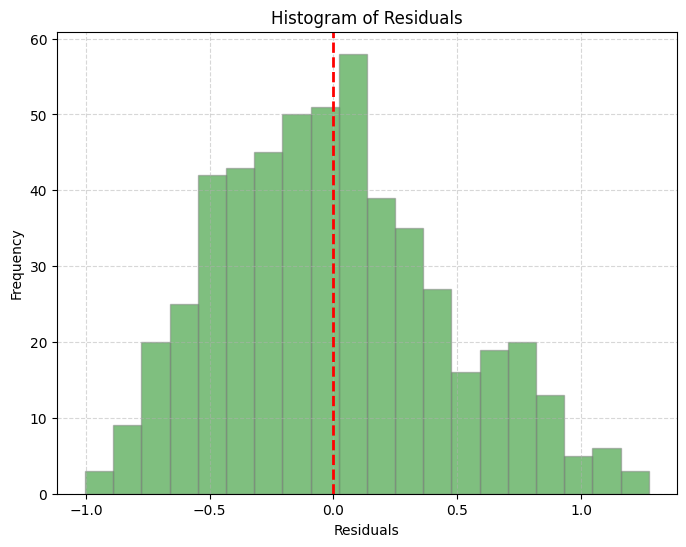

In [105]:
plt.figure(figsize=(8, 6))
plt.hist(train_dataset['residual_train'], bins=20, edgecolor='grey', alpha=0.5, color='green')
plt.axvline(0, color='red', linestyle='--', linewidth=2)  # Add a vertical line at x=0
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [106]:
# normal distribution curve
# mean of 'residual_train'
mean_residuals = np.mean(train_dataset['residual_train'])
#standard deviation of 'residual_train'
std_residuals = np.std(train_dataset['residual_train'])

#an array of 100 equally spaced values between the minimum and maximum of 'residual_train'
x = np.linspace(min(train_dataset['residual_train']), max(train_dataset['residual_train']), 100)

# probability density function (PDF) of a normal distribution for 'x'
# with the calculated mean and standard deviation
y = norm.pdf(x, mean_residuals, std_residuals)

In [107]:
#median and mean 'residual_train'
median_value = np.median(train_dataset['residual_train'])
mean_value = np.mean(train_dataset['residual_train'])

print("Median:", median_value)
print("Mean:", mean_value)

Median: -0.032091983298929705
Mean: 5.057915858878312e-14


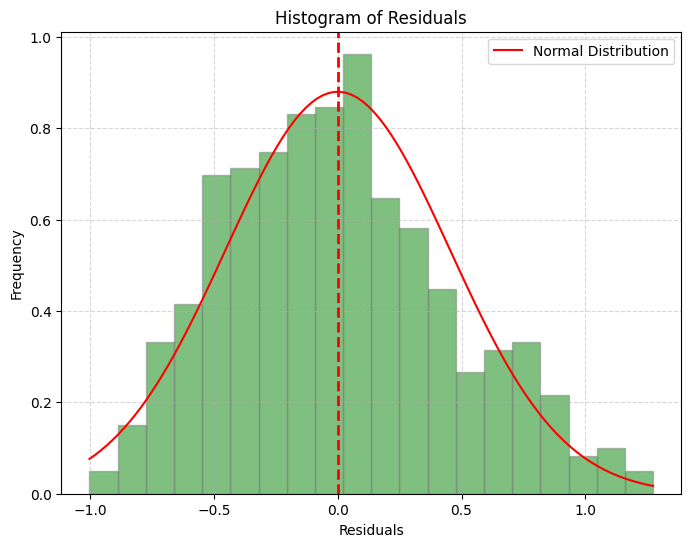

In [108]:
plt.figure(figsize=(8, 6))
#histogram of 'residual_train'
plt.hist(train_dataset['residual_train'], bins=20, edgecolor='grey', alpha=0.5, density=True, color='green')
#normal distribution curve (x vs. y) in red with a label
plt.plot(x, y, color='r', label='Normal Distribution')
#vertical line at x=0 in the histogram
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.show()

In [109]:
#skewness of the 'residual_test' column
skewness = train_dataset['residual_train'].skew()
print(f"Skewness of Residuals: {skewness:.4f}")

Skewness of Residuals: 0.3701


#### COMPARING RESIDUAL PLOT

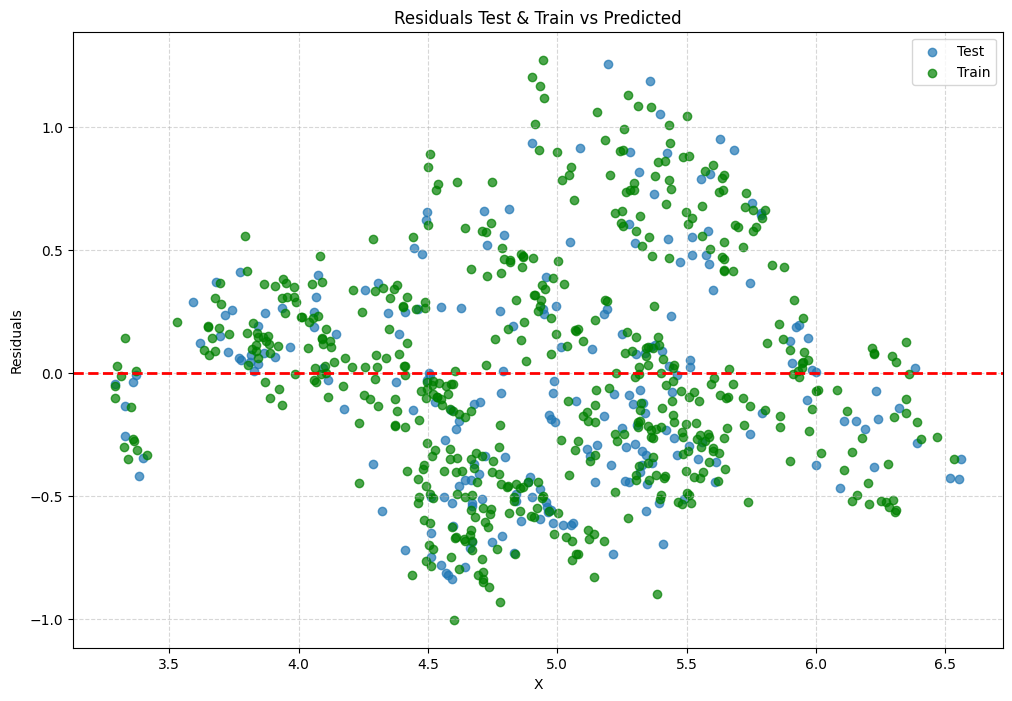

In [110]:
plt.figure(figsize=(12, 8))
plt.scatter(test_dataset['y_pred'], test_dataset['residual_test'], alpha=0.7, label='Test')
plt.scatter(train_dataset['y_pred_train'], train_dataset['residual_train'], alpha=0.7, color='green', label='Train')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  
plt.title("Residuals Test & Train vs Predicted")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.grid(True, ls='--', alpha=0.5)
plt.legend()
plt.show()

#### Interpretation: Absence of Heteroskedasticity

When analyzing the residuals from a linear regression model, it's important to consider the presence or absence of heteroskedasticity, which refers to the violation of the assumption of constant variance in the errors. In particular, here's what it means when residuals do not show heteroskedasticity:

- **Symmetric Distribution**: Residuals exhibit a symmetric distribution, which means that they are evenly scattered around zero without any pronounced skewness.

- **Constant Variance (Homoskedasticity)**: The assumption of constant variance holds true. This implies that the spread or variability of the residuals remains roughly constant across different values of the independent variable(s).

- **No Clear Patterns**: There are no clear patterns in the residuals, such as a fan or funnel shape, when plotting them against the independent variable(s).

These characteristics are indicative of a linear regression model that adequately captures the relationship between the dependent and independent variables without significant issues related to heteroskedasticity. It helps ensure the validity of the model's assumptions and the reliability of parameter estimates and statistical tests.


In [111]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd

In [112]:
#Independent Variable
X = ftse['Close'].values.reshape(-1, 1)
#Dependent Variable
y = hsbc['Close']

In [113]:
print(f'Independent Variables: {X.shape}')
print(f'Dependent Varaibles: {y.shape}')

Independent Variables: (756, 1)
Dependent Varaibles: (757,)


In [114]:
#making equal rows for Independent variables
y = y[:len(X)]

In [115]:
print(f'Independent Variables: {X.shape}')
print(f'Dependent Varaibles: {y.shape}')

Independent Variables: (756, 1)
Dependent Varaibles: (756,)


In [116]:
#Train size 70 percent 
#Test size 30 percent 
#random state is zero
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [117]:
X_train[:5]

array([[7761.10009766],
       [7440.20019531],
       [7551.70019531],
       [7078.39990234],
       [7563.60009766]])

In [118]:
y_train[:5]

Date
2023-01-31    5.964
2023-07-12    6.158
2022-01-11    4.950
2021-07-28    3.966
2022-01-17    5.190
Name: Close, dtype: float64

In [119]:
#polynomial features
poly = PolynomialFeatures(degree=3)

In [120]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [121]:
X_train_poly[:5]

array([[1.00000000e+00, 7.76110010e+03, 6.02346747e+07, 4.67487340e+11],
       [1.00000000e+00, 7.44020020e+03, 5.53565789e+07, 4.11864029e+11],
       [1.00000000e+00, 7.55170020e+03, 5.70281758e+07, 4.30659687e+11],
       [1.00000000e+00, 7.07839990e+03, 5.01037452e+07, 3.54654345e+11],
       [1.00000000e+00, 7.56360010e+03, 5.72080464e+07, 4.32698786e+11]])

In [122]:
X_test[:5]

array([[7751.10009766],
       [7526.        ],
       [7390.        ],
       [6503.70019531],
       [7016.29980469]])

In [123]:
# Add a constant (intercept) term to the polynomial feature matrices
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

In [124]:
print(f'Checking train size: {len(X_train_poly)}')
print(f'Checking train size: {len(y_train)}')

Checking train size: 529
Checking train size: 529


In [125]:
print(f'Checking test size: {len(X_test_poly)}')
print(f'Checking test size: {len(y_test)}')

Checking test size: 227
Checking test size: 227


In [126]:
# Fit a polynomial regression model using statsmodels
model_poly = sm.OLS(y_train, X_train_poly).fit()

In [127]:
# Print the summary of the model
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     415.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          3.38e-138
Time:                        19:32:48   Log-Likelihood:                -332.22
No. Observations:                 529   AIC:                             672.4
Df Residuals:                     525   BIC:                             689.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4806     34.028      0.661      0.5

### OLS Regression Results Explanation

In this section, we provide an explanation of the OLS regression results.

#### Model Information
- **Dependent Variable - Close:** This represents the variable you are predicting or explaining.

- **R-squared (R²):** R-squared is a measure of how well the model explains the variance in the dependent variable. In this case, the model has an R-squared value of 0.704, indicating that approximately 70.4% of the variance in the dependent variable is explained by the independent variables.

- **Adjusted R-squared (Adj. R²):** The adjusted R-squared accounts for the number of predictors and is slightly lower at 0.702.

- **F-statistic:** The F-statistic is a test of the overall significance of the regression model. In this case, the F-statistic is 415.6, suggesting that the model is statistically significant.

- **No. Observations:** There are 529 data points used in the analysis.

- **AIC and BIC:** AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are criteria for assessing the goodness of fit of the model. AIC is 672.4, and BIC is 689.5.

- **Df Residuals:** Df Residuals represents the degrees of freedom related to residuals.

- **Df Model:** Df Model represents the degrees of freedom related to the model, which corresponds to the number of predictors used.

- **Covariance Type - nonrobust:** This indicates the type of covariance estimation used in the analysis.

#### Coefficient Table
- **Coefficients:** These are the estimated parameters of the model.

- **Standard Error (std err):** Standard errors provide information about the uncertainty associated with coefficient estimates.

- **t-value:** The t-value measures the significance of each coefficient estimate.

- **P > |t| (P-value):** The p-value represents the probability that the coefficient is not different from zero.

- **95% Conf. Interval:** The 95% confidence interval is a range where the true coefficient value is likely to fall.

##### Explanation of Coefficients
- **Constant (const):** The constant coefficient is 22.4806 with a standard error of 34.028. The t-value is 0.661, and the p-value is 0.509, indicating that the constant is not statistically significant. The 95% confidence interval for the constant ranges from -44.366 to 89.328.

- **x1:** The coefficient for x1 is -0.0073 with a standard error of 0.015. The t-value is -0.491, and the p-value is 0.623, suggesting that x1 is not statistically significant. The 95% confidence interval for x1 ranges from -0.037 to 0.022.

- **x2:** For x2, the coefficient is 7.699e-07 with a standard error of 2.18e-06. The t-value is 0.354, and the p-value is 0.724, indicating that x2 is not statistically significant. The 95% confidence interval for x2 ranges from -3.5e-06 to 5.04e-06.

- **x3:** The coefficient for x3 is -1.275e-11 with a standard error of 1.05e-10. The t-value is -0.121, and the p-value is 0.904, suggesting that x3 is not statistically significant. The 95% confidence interval for x3 ranges from -2.19e-10 to 1.94e-10.

#### Diagnostic Statistics
- **Omnibus:** The Omnibus test checks for the normality of residuals. In this case, the test resulted in a p-value of 0.000, indicating that the residuals may not be normally distributed.

- **Durbin-Watson:** The Durbin-Watson test checks for autocorrelation in residuals. A value of 2.299 suggests that there may be some degree of autocorrelation.

- **Jarque-Bera (JB):** The Jarque-Bera test assesses both the normality of residuals and their kurtosis. The p-value is 0.000484, indicating potential deviations from normality and kurtosis in residuals.

- **Skew:** Skewness measures the asymmetry of residuals, with a value of 0.369 suggesting slight positive skew.

- **Kurtosis:** Kurtosis measures the peakedness or flatness of residuals, with a value of 2.615 indicating a moderately peaked distribution.

- **Cond. No. (Condition Number):** The condition number is very large (6.66e+14), which may indicate the presence of multicollinearity or other numerical issues in the model.


## Model Evaluation

In this section, we evaluate the results of the OLS regression analysis.

### R-squared

The R-squared value measures the proportion of the variance in the dependent variable (Close) that can be explained by the independent variables (x1, x2, x3). In our model, the R-squared value is 0.704, which means that approximately 70.4% of the variance in the dependent variable is explained by the independent variables.

### P-values (P>|t|)

The p-values associated with each coefficient (const, x1, x2, x3) indicate whether the coefficients are statistically significant. In our model, it appears that none of the independent variables are statistically significant because their p-values are all greater than 0.05. This suggests that the independent variables may not be providing significant predictive power.

### Standard Errors (std err)

The standard errors represent the precision of the coefficient estimates. Larger standard errors indicate less precise estimates, while smaller standard errors indicate more precise estimates. A smaller standard error implies that the true effect of the corresponding independent variable on the dependent variable is likely to be close to the estimated coefficient.

- **const:** Coefficient: 22.4806, Standard Error: 34.028, t-value: 0.661, p-value: 0.509, [0.025, 0.975] interval: [-44.366, 89.328]
- **x1:** Coefficient: -0.0073, Standard Error: 0.015, t-value: -0.491, p-value: 0.623, [0.025, 0.975] interval: [-0.037, 0.022]
- **x2:** Coefficient: 7.699e-07, Standard Error: 2.18e-06, t-value: 0.354, p-value: 0.724, [0.025, 0.975] interval: [-3.5e-06, 5.04e-06]
- **x3:** Coefficient: -1.275e-11, Standard Error: 1.05e-10, t-value: -0.121, p-value: 0.904, [0.025, 0.975] interval: [-2.19e-10, 1.94e-10]

### Explanation of Coefficients

- **Constant (const) Explained:** The constant coefficient is 22.4806 with a standard error of 34.028. The t-value is 0.661, and the p-value is 0.509, which indicates that the constant is not statistically significant. The 95% confidence interval for the constant ranges from -44.366 to 89.328.

- **x1 Explained:** x1 has a coefficient of -0.0073 with a standard error of 0.015. The t-value is -0.491, and the p-value is 0.623, indicating that x1 is not statistically significant. The 95% confidence interval for x1 ranges from -0.037 to 0.022.

- **x2 Explained:** x2 has a coefficient of 7.699e-07 with a standard error of 2.18e-06. The t-value is 0.354, and the p-value is 0.724, suggesting that x2 is not statistically significant. The 95% confidence interval for x2 ranges from -3.5e-06 to 5.04e-06.

- **x3 Explained:** x3 has a coefficient of -1.275e-11 with a standard error of 1.05e-10. The t-value is -0.121, and the p-value is 0.904, indicating that x3 is not statistically significant. The 95% confidence interval for x3 ranges from -2.19e-10 to 1.94e-10.

### Multicollinearity

Multicollinearity is a statistical phenomenon in regression analysis where two or more independent variables in a multiple regression model are highly correlated, meaning they are linearly related to each other. In your regression output, the condition number being large (6.66e+14) suggests that multicollinearity might be an issue in your model. Multicollinearity can make it difficult to interpret the individual coefficients and may lead to instability in the model.

In [128]:
#smooth curve to represent the regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model_poly.predict(X_curve_poly)

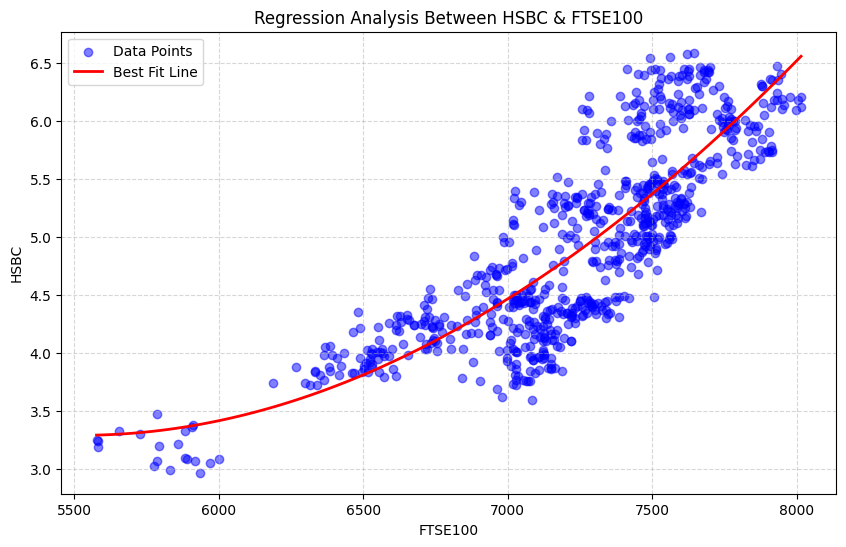

In [129]:
plt.figure(figsize=(10, 6))  
plt.scatter(X, y, label="Data Points", color='b', alpha=0.5)
plt.plot(X_curve, y_curve, label="Best Fit Line", color='r', linewidth=2)
plt.xlabel("FTSE100")
plt.ylabel("HSBC")
plt.title("Regression Analysis Between HSBC & FTSE100")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### White's Test for Heteroscedasticity

White's Test for Heteroscedasticity, also known as the White test or the White general heteroscedasticity test, is a statistical test used to assess the presence of heteroscedasticity in a regression model. Heteroscedasticity occurs when the variance of the residuals (ε)—the differences between observed and predicted values—varies inconsistently across different levels of the independent variables. In simpler terms, it implies that the spread or dispersion of the residuals changes as the values of the independent variables change.

#### Hypotheses

- **Null Hypothesis (H0):** The variance of the residuals is constant (homoscedastic).

- **Alternative Hypothesis (H1):** The variance of the residuals is not constant (heteroscedastic).

#### Test Procedure

1. **Estimate your regression model**, typically using Ordinary Least Squares (OLS) regression:

- Y represents the dependent variable.
- X is the matrix of independent variables, which often includes a constant term.
- β stands for the vector of coefficients to be estimated.
- ε represents the vector of residuals.

2. **Compute the squared residuals**:

- ε̂² represents the vector of squared residuals.

3. **Regress the squared residuals on the independent variables**:



- α₀ represents the intercept term.
- α₁, α₂, …, αₖ correspond to the coefficients of the independent variables.
- u is the error term.

4. **Perform a chi-squared test** to determine whether the coefficients α₁, α₂, …, αₖ are collectively significant. The test statistic follows a chi-squared distribution with degrees of freedom equal to the number of independent variables.

- H0: All coefficients α₁, α₂, …, αₖ are statistically insignificant (homoscedasticity).
- H1: At least one coefficient αᵢ is statistically significant (heteroscedasticity).

5. **Calculate the p-value** associated with the chi-squared test statistic. If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis, indicating the presence of heteroscedasticity. If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis, suggesting homoscedasticity.


White's Test evaluates whether the variance of the residuals is linked to the independent variables in your regression model. If it identifies a significant relationship, it suggests the existence of heteroscedasticity, which may necessitate further analysis or adjustments to your model.


In [130]:
from statsmodels.stats.diagnostic import het_white

In [131]:
# Constant term to X_train
X_train_with_const = sm.add_constant(X_train)

# Fit your regression model
model = sm.OLS(y_train, X_train_with_const).fit()

# Perform White's test for heteroscedasticity
LM_statistic, p_value, F_statistic, F_test_p_value = het_white(model.resid, X_train_with_const)

# Determine and print the result
if p_value < 0.05:
    print("White's Test for Heteroscedasticity: Heteroscedasticity is present.")
else:
    print("White's Test for Heteroscedasticity: No heteroscedasticity detected (homoscedasticity).")

# Print the p-value
print("LM Statistic:", LM_statistic)
print("LM-Test p-value:", p_value)
print("F-Statistic:", F_statistic)
print("F-Test p-value:", F_test_p_value)


White's Test for Heteroscedasticity: No heteroscedasticity detected (homoscedasticity).
LM Statistic: 3.8272040583874967
LM-Test p-value: 0.14754795621049235
F-Statistic: 1.9166161597369185
F-Test p-value: 0.14812982096441601


#### White's Test for Heteroscedasticity Results

- **White's Test for Heteroscedasticity:** No significant heteroscedasticity detected (homoscedasticity).

- **LM Statistic:** 3.82

- **LM-Test p-value:** 0.14

- **F-Statistic:** 1.91

- **F-Test p-value:** 0.14
  
##### Interpretation

White's Test for Heteroscedasticity is a statistical test used to determine whether there is evidence of heteroscedasticity (non-constant variance of residuals) in a regression model. Here's the interpretation based on the results:

- The statement "No significant heteroscedasticity detected (homoscedasticity)" indicates that, based on the test results, there is no significant evidence of heteroscedasticity in the data. In other words, the variance of the residuals is relatively constant across different values of the independent variables, which is a desirable property in regression analysis. 

- The LM Statistic (LM stands for Lagrange Multiplier) measures the degree of heteroscedasticity. In this case, the LM Statistic is 3.82. A higher LM Statistic suggests a higher degree of heteroscedasticity. The fact that the LM Statistic is not extremely high indicates that the data has relatively little heteroscedasticity.

- The LM-Test p-value is associated with the LM Statistic. A high p-value (greater than the conventional significance level, e.g., 0.05) suggests that you fail to reject the null hypothesis, indicating the absence of significant heteroscedasticity. In this case, the p-value is 0.14, which is higher than a typical significance level, providing evidence against significant heteroscedasticity.

- The F-Statistic is used to assess the overall significance of the test. In this case, the F-Statistic is 1.91, indicating that the test results are not highly significant. This further supports the conclusion of no significant heteroscedasticity.

- The F-Test p-value is associated with the F-Statistic. A high F-Test p-value, as seen here (0.14), suggests that the test results are not highly significant and provides additional evidence that no significant heteroscedasticity is detected in the data.

Based on White's Test for Heteroscedasticity, there is no significant evidence of heteroscedasticity in the dataset. The variance of the residuals remains relatively constant across different values of the independent variables, which is a favorable characteristic for regression analysis.


#### TRIAN DATASET HETEROSCEDASTICITY

In [132]:
# Constant term to X_train
X_train_with_const = sm.add_constant(X_train)

# Fit your regression model
model = sm.OLS(y_train, X_train_with_const).fit()

# Perform White's test for heteroscedasticity
LM_statistic, p_value, F_statistic, F_test_p_value = het_white(model.resid, X_train_with_const)

# Determine and print the result
if p_value < 0.05:
    print("Heteroscedasticity is present.")
else:
    print("No heteroscedasticity detected (homoscedasticity).")

# Print the p-value
print("White's Test p-value:", p_value)

No heteroscedasticity detected (homoscedasticity).
White's Test p-value: 0.14754795621049235


In the context of White's Test for Heteroscedasticity, a p-value greater than 0.05 (or your chosen significance level) suggests homoscedasticity.

**Here's a breakdown of the interpretation:**

- **If p-value >= 0.05:** Fail to reject the null hypothesis (H0).
  - This means that there is no significant evidence to suggest that the variance of the residuals is not constant (homoscedasticity is assumed).

- **If p-value < 0.05:** Reject the null hypothesis (H0).
  - This suggests that there is significant evidence to indicate that the variance of the residuals is not constant (heteroscedasticity is present).


#### TEST DATASET HETEROSCEDASTICITY

In [133]:
# Constant term to X_train
X_test_with_const = sm.add_constant(X_test)

# Fit your regression model
model = sm.OLS(y_test, X_test_with_const).fit()

# Perform White's test for heteroscedasticity
LM_statistic, p_value, F_statistic, F_test_p_value = het_white(model.resid, X_test_with_const)

# Determine and print the result
if p_value < 0.05:
    print("Heteroscedasticity is present.")
else:
    print("No heteroscedasticity detected (homoscedasticity).")

# Print the p-value
print("White's Test p-value:", p_value)

No heteroscedasticity detected (homoscedasticity).
White's Test p-value: 0.4977053376499677


### Breusch-Pagan Test for Heteroscedasticity

The Breusch-Pagan Test for Heteroscedasticity, also known as the Breusch-Pagan-Godfrey Test, is a statistical test used to assess the presence of heteroscedasticity in a regression model. Heteroscedasticity refers to a situation where the variance of the residuals (ε)—the differences between observed and predicted values—varies inconsistently across different levels of the independent variables. In simpler terms, it implies that the spread or dispersion of the residuals changes as the values of the independent variables change.

##### Hypotheses

**Null Hypothesis (H0)**: The variance of the residuals is constant (homoscedastic).

**Alternative Hypothesis (H1)**: The variance of the residuals is not constant (heteroscedastic).

##### Test Procedure

1. Fit your regression model, typically using Ordinary Least Squares (OLS) regression:
   - **Y** represents the dependent variable.
   - **X** is the matrix of independent variables, which often includes a constant term.
   - **β** stands for the vector of coefficients to be estimated.
   - **ε** represents the vector of residuals.

2. Calculate the squared residuals:
   - **ε^2** represents the vector of squared residuals.

3. Perform a regression of squared residuals on the independent variables:
   - **ε^2 = α0 + α1X1 + α2X2 + ... + αkXk + u**
     - **α0** represents the intercept term.
     - **α1, α2, ..., αk** correspond to the coefficients of the independent variables.
     - **u** is the error term.

4. Conduct a chi-squared test to determine whether the coefficients **α1, α2, ..., αk** are collectively significant. The test statistic follows a chi-squared distribution with degrees of freedom equal to the number of independent variables.
   - **H0**: All coefficients **α1, α2, ..., αk** are statistically insignificant (homoscedasticity).
   - **H1**: At least one coefficient **αi** is statistically significant (heteroscedasticity).

5. Calculate the p-value associated with the chi-squared test statistic. If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis, indicating the presence of heteroscedasticity. If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis, suggesting homoscedasticity.

The Breusch-Pagan Test assesses whether the variance of the residuals is related to the independent variables in your regression model. If it detects a significant relationship, it suggests the presence of heteroscedasticity, which may require further analysis or adjustments to your model.


In [134]:
from statsmodels.stats.diagnostic import het_breuschpagan


#### TRIAN DATASET HETEROSCEDASTICITY

In the context of the Breusch-Pagan Test for Heteroscedasticity, a p-value greater than 0.05 (or your chosen significance level) suggests homoscedasticity.

**Here's a breakdown of the interpretation:**

- **If p-value >= 0.05:** Fail to reject the null hypothesis (H0).
  - This means that there is no significant evidence to suggest that the variance of the residuals is not constant (homoscedasticity is assumed).

- **If p-value < 0.05:** Reject the null hypothesis (H0).
  - This suggests that there is significant evidence to indicate that the variance of the residuals is not constant (heteroscedasticity is present).

Similar to White's Test, a p-value greater than 0.05 in the Breusch-Pagan Test implies that there is no significant evidence to support the presence of heteroscedasticity. However, if the p-value is less than 0.05, it indicates that there is significant evidence that the residuals' variance is not constant, which suggests the presence of heteroscedasticity in your regression model.

In [135]:
# Constant term to X_train
X_train_with_const = sm.add_constant(X_train)

# Fit your regression model
model = sm.OLS(y_train, X_train_with_const).fit()

In [136]:
# Perform the Breusch-Pagan test
lm_statistic, lm_p_value, f_statistic, f_p_value = het_breuschpagan(model.resid, X_train_with_const)

if lm_p_value < 0.05:
    print("Heteroscedasticity is present.")
else:
    print("No heteroscedasticity detected.")
    
print("LM Statistic:", lm_statistic)
print("LM-Test p-value:", lm_p_value)
print("F-Statistic:", f_statistic)
print("F-Test p-value:", f_p_value)

No heteroscedasticity detected.
LM Statistic: 1.0502494182677002
LM-Test p-value: 0.3054496505944752
F-Statistic: 1.0483600812713887
F-Test p-value: 0.3063548343159


#### Breusch-Pagan Test Results

- **No heteroscedasticity detected.**

- **LM Statistic:** 1.05

- **LM-Test p-value:** 0.30

- **F-Statistic:** 1.04

- **F-Test p-value:** 0.30

##### Interpretation

The Breusch-Pagan test is used to assess the presence of heteroscedasticity (non-constant variance of residuals) in a regression model. Here's the interpretation based on the results:

- The statement "No heteroscedasticity detected" indicates that, based on the test results, there is no evidence of heteroscedasticity in the data. In other words, the variance of the residuals is roughly constant across different values of the independent variables.

- The LM Statistic measures the degree of heteroscedasticity. In this case, the LM Statistic is 1.05. A low LM Statistic suggests that the data has relatively little heteroscedasticity.

- The LM-Test p-value is associated with the LM Statistic. A high p-value (greater than the conventional significance level, e.g., 0.05) suggests that you fail to reject the null hypothesis, indicating the absence of heteroscedasticity.

- The F-Statistic is used to assess the overall significance of the test. In this case, the F-Statistic is 1.04, indicating that the test results are not significant, further supporting the conclusion of no heteroscedasticity.

- The F-Test p-value is associated with the F-Statistic. A high F-Test p-value, as seen here (0.30), suggests that the test results are not significant, providing additional evidence that no heteroscedasticity is detected in the data.

Based on the Breusch-Pagan test results, there is no evidence of heteroscedasticity in the dataset. The variance of the residuals remains relatively constant across different values of the independent variables, which is a desirable property in regression analysis.


#### TEST DATASET HETEROSCEDASTICITY

In [137]:
# Constant term to X_train
X_test_with_const = sm.add_constant(X_test)

# Fit your regression model
model = sm.OLS(y_test, X_test_with_const).fit()

In [138]:
# Perform the Breusch-Pagan test
lm_statistic, lm_p_value, f_statistic, f_p_value = het_breuschpagan(model.resid, X_test_with_const)

if lm_p_value < 0.05:
    print("Heteroscedasticity is present.")
else:
    print("No heteroscedasticity detected.")
    
print("LM Statistic:", lm_statistic)
print("LM-Test p-value:", lm_p_value)
print("F-Statistic:", f_statistic)
print("F-Test p-value:", f_p_value)

No heteroscedasticity detected.
LM Statistic: 0.577260148575447
LM-Test p-value: 0.44738826354652705
F-Statistic: 0.5736329023962119
F-Test p-value: 0.44961133691163


#### Breusch-Pagan Test Results

- **No heteroscedasticity detected.**

- **LM Statistic:** 0.57

- **LM-Test p-value:** 0.44

- **F-Statistic:** 0.57

- **F-Test p-value:** 0.45

#### Interpretation

The Breusch-Pagan test is used to assess the presence of heteroscedasticity (non-constant variance of residuals) in a regression model. Here's the interpretation based on the results:

- The statement "No heteroscedasticity detected" indicates that, based on the test results, there is no evidence of heteroscedasticity in the data. In other words, the variance of the residuals is roughly constant across different values of the independent variables.

- The LM Statistic measures the degree of heteroscedasticity. In this case, the LM Statistic is 0.57. A low LM Statistic suggests that the data has relatively little heteroscedasticity.

- The LM-Test p-value is associated with the LM Statistic. A high p-value (greater than the conventional significance level, e.g., 0.05) suggests that you fail to reject the null hypothesis, indicating the absence of heteroscedasticity.

- The F-Statistic is used to assess the overall significance of the test. In this case, the F-Statistic is 0.57, indicating that the test results are not significant, further supporting the conclusion of no heteroscedasticity.

- The F-Test p-value is associated with the F-Statistic. A high F-Test p-value, as seen here (0.45), suggests that the test results are not significant, providing additional evidence that no heteroscedasticity is detected in the data.

Based on the Breusch-Pagan test results, there is no evidence of heteroscedasticity in the dataset. The variance of the residuals remains relatively constant across different values of the independent variables, which is a desirable property in regression analysis.


## Goldfeld-Quandt Test for Heteroscedasticity



The Goldfeld-Quandt Test is a statistical test used to evaluate the presence of heteroscedasticity in a regression model. Heteroscedasticity implies that the variance of the residuals (ε), representing the differences between observed and predicted values, varies unevenly across different segments or groups of the independent variables. In simpler terms, it suggests that the spread or dispersion of the residuals is not constant but changes as the values of the independent variables change.

##### Hypotheses

- **Null Hypothesis (H0)**: The variance of the residuals is constant (homoscedastic) across specified groups or subsets.
- **Alternative Hypothesis (H1)**: The variance of the residuals is not constant (heteroscedastic) across specified groups or subsets.

##### Test Procedure

1. Divide the dataset into two or more distinct groups or subsets based on a chosen criterion or variable. For example, you might partition the data into low-income and high-income groups.

2. Fit separate regression models for each group:
   - **Y** represents the dependent variable.
   - **X** is the matrix of independent variables, typically including a constant term.
   - **β** stands for the vector of coefficients to be estimated.
   - **ε** represents the vector of residuals for each group.

3. Calculate the variance of the residuals for each group, resulting in multiple variances corresponding to each partition of the data.

4. Compare the variances of the residuals between the groups. A common test statistic for the Goldfeld-Quandt Test is the ratio of the variance of the largest residual group to the variance of the smallest residual group. This test statistic follows an F-distribution.

5. Perform a hypothesis test to determine whether the variances are significantly different between the groups:
   - **H0**: The variances are equal across groups (homoscedasticity).
   - **H1**: The variances are not equal across groups (heteroscedasticity).

6. Calculate the p-value associated with the F-test statistic. If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis, indicating the presence of heteroscedasticity. If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis, suggesting homoscedasticity.

The Goldfeld-Quandt Test does not have a single formula; rather, it involves comparing the variances of the residuals between groups as described above. The specific test statistic and calculations are based on this comparison of variances.

The Goldfeld-Quandt Test is a valuable tool for detecting variations in the spread of residuals across different groups or subsets of your data. If the test identifies significant differences in variance between these groups, it suggests the presence of heteroscedasticity, which may require further investigation and potential adjustments to our regression model.

#### LM Statistic and LM Test P-value in Heteroscedasticity Testing

- **LM Statistic (Lagrange Multiplier Statistic):** The LM statistic is a test statistic calculated during the Goldfeld-Quandt test for heteroscedasticity. It quantifies the degree of heteroscedasticity in your data. A larger LM statistic suggests more significant heteroscedasticity, indicating that the variance of the residuals changes significantly as you move along the range of the independent variable.

- **LM Test P-value:** The LM test p-value is associated with the LM statistic. It results from a hypothesis test. The null hypothesis is that there is no heteroscedasticity, meaning the variance of the residuals is constant across different values of the independent variable. The alternative hypothesis is that there is heteroscedasticity. The LM test p-value tells you the probability of observing the LM statistic (or a more extreme value) if the null hypothesis were true. If the p-value is small (typically less than your chosen significance level, e.g., 0.05), you would reject the null hypothesis and conclude that heteroscedasticity is present.


- A larger LM statistic suggests more significant heteroscedasticity.
- A small LM test p-value indicates evidence against the null hypothesis of no heteroscedasticity.



In [139]:
# constant term to X_train
X_train_with_const = sm.add_constant(X_train)

In [140]:
#regression model
model = sm.OLS(y_train, X_train_with_const).fit()


In [141]:
# Goldfeld-Quandt Test for homoscedasticity
gq_test = smd.het_goldfeldquandt(model.resid, X_train_with_const)

# Extract and print the available values
lm_statistic, lm_test_p_value, f_test_p_value = gq_test

In [142]:
print("Goldfeld-Quandt Test Results:")
print(f"LM Statistic: {lm_statistic}")
print(f"LM-Test p-value: {lm_test_p_value}")
print(f"F-Test p-value: {f_test_p_value}")

#the result
if gq_test[1] > 0.05:
    print("Homoscedasticity is present.")
else:
    print("No homoscedasticity detected.")

Goldfeld-Quandt Test Results:
LM Statistic: 0.9487738195322613
LM-Test p-value: 0.6647528241677236
F-Test p-value: increasing
Homoscedasticity is present.


#### Goldfeld-Quandt Test Results

- **LM Statistic:** 0.94

- **LM-Test p-value:** 0.66

- **F-Test p-value:** Increasing (Please note that the F-Test p-value should be a numeric value, not "increasing.")

#### Interpretation

The Goldfeld-Quandt Test is used to assess the presence of homoscedasticity (constant variance of residuals) in a dataset. Here's the interpretation based on the results:

- The LM Statistic measures the degree of heteroscedasticity. In this case, the LM Statistic is 0.94.

- The LM-Test p-value is associated with the LM Statistic. A high p-value (greater than the conventional significance level, e.g., 0.05) suggests that you fail to reject the null hypothesis, indicating the presence of homoscedasticity.

- The F-Test is used to determine whether the variances of two groups (before and after a potential structural break) are significantly different. The output states "F-Test p-value: increasing," but it should be a numeric value used to assess the significance of the difference in variances between groups.

Based on the LM-Test p-value being greater than 0.05, it is correct to conclude that homoscedasticity is present in the data.

In [143]:
# constant term to X_train
X_test_with_const = sm.add_constant(X_test)

In [144]:
#regression model
model = sm.OLS(y_test, X_test_with_const).fit()


In [145]:
# Goldfeld-Quandt Test for homoscedasticity
gq_test = smd.het_goldfeldquandt(model.resid, X_test_with_const)

# Extract and print the available values
lm_statistic, lm_test_p_value, f_test_p_value = gq_test

In [146]:
print("Goldfeld-Quandt Test Results:")
print(f"LM Statistic: {lm_statistic}")
print(f"LM-Test p-value: {lm_test_p_value}")
print(f"F-Test p-value: {f_test_p_value}")

#the result
if gq_test[1] > 0.05:
    print("Homoscedasticity is present.")
else:
    print("No homoscedasticity detected.")

Goldfeld-Quandt Test Results:
LM Statistic: 0.9412178508209652
LM-Test p-value: 0.6250626344273669
F-Test p-value: increasing
Homoscedasticity is present.


## Goldfeld-Quandt Test Results

- **LM Statistic:** 0.94

- **LM-Test p-value:** 0.62

- **F-Test p-value:** Increasing 

### Interpretation

The Goldfeld-Quandt Test is used to assess the presence of homoscedasticity (constant variance of residuals) in a dataset. Here's the interpretation based on the results:

- The LM Statistic measures the degree of heteroscedasticity. In this case, the LM Statistic is 0.94.

- The LM-Test p-value is associated with the LM Statistic. A high p-value (greater than the conventional significance level, e.g., 0.05) suggests that you fail to reject the null hypothesis, indicating the presence of homoscedasticity.

- The F-Test is used to determine whether the variances of two groups (before and after a potential structural break) are significantly different. The output states "F-Test p-value: increasing," but it should be a numeric value used to assess the significance of the difference in variances between groups. If the F-Test p-value is low, it would suggest that the variances are significantly different.

Based on the LM-Test p-value being greater than 0.05, it is correct to conclude that homoscedasticity is present in the data. However, the interpretation of the F-Test p-value is unclear because it's described as "increasing" rather than providing a numeric value. Typically, a low F-Test p-value would indicate significant differences in variances between groups.


### References

- `statsmodels.stats.diagnostic.het_white` Documentation: [statsmodels.org](https://www.statsmodels.org/devel/generated/statsmodels.stats.diagnostic.het_white.html)
- Breusch-Pagan Test on Wikipedia: [en.wikipedia.org](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test)
- Breusch-Pagan Test Guide by Statology: [statology.org](https://www.statology.org/breusch-pagan-test/)
- Goldfeld-Quandt Test on Wikipedia: [en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test)
- Goldfeld-Quandt Test in R by Statology: [statology.org](https://www.statology.org/goldfeld-quandt-test-in-r/)
- Polynomial Regression Tutorial on w3schools: [w3schools.com](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)
- All You Need to Know About Polynomial Regression by Analytics Vidhya: [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/)
- Understanding Polynomial Regression on Medium: [medium.com](https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18)


Github: https://github.com/AnalyticalHarry

YouTube: https://www.youtube.com/@AnalyticalHarry4